In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./Downloads/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
test = pd.read_csv('./Downloads/test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
train.shape

(1168, 81)

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

1. Id

In [7]:
train['Id'].unique()

array([127, 889, 793, ..., 196,  31, 617], dtype=int64)

In [8]:
train['Id'].isnull().sum()

0

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['Id'])
plt.xlabel('Id')
plt.subplot(222)
sns.scatterplot(x= 'Id', y= 'SalePrice', data= train)
plt.xlabel('Id')
plt.ylabel('SalePrice')
plt.show()

2. MSSubClass

In [10]:
train['MSSubClass'].unique()

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

In [11]:
train['MSSubClass'].isnull().sum()

0

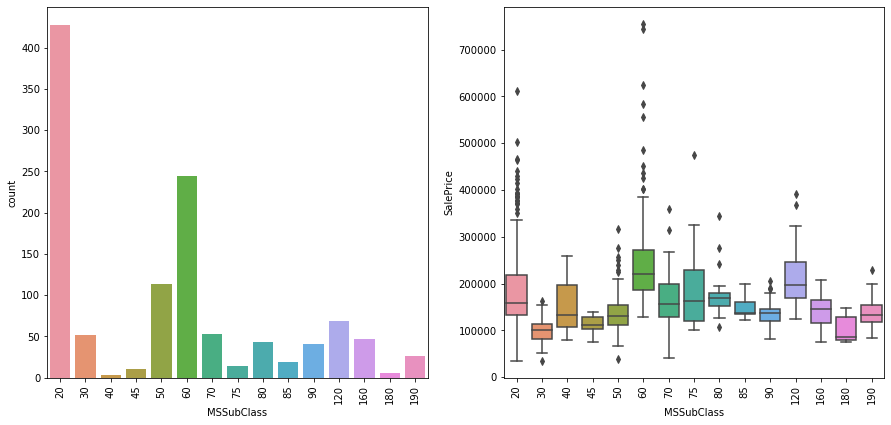

In [12]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MSSubClass'])
plt.xlabel('MSSubClass')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MSSubClass', y= 'SalePrice', data= train)
plt.xlabel('MSSubClass')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

3. MSZoning

In [13]:
train['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [14]:
train['MSZoning'].isnull().sum()

0

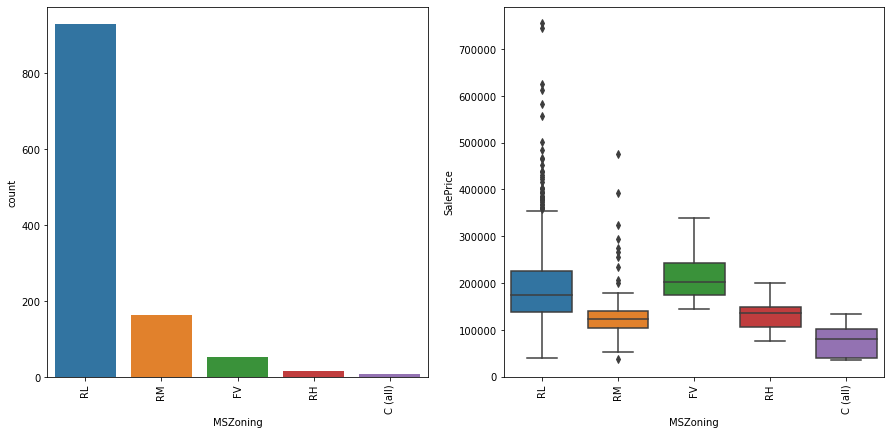

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MSZoning'])
plt.xlabel('MSZoning')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MSZoning', y= 'SalePrice', data= train)
plt.xlabel('MSZoning')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

4. LotFrontage

In [16]:
train['LotFrontage'].unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

In [17]:
train['LotFrontage'].isnull().sum()

214

In [18]:
train['LotFrontage'] = train['LotFrontage'].fillna(method= 'bfill')
train['LotFrontage'] = train['LotFrontage'].fillna(method= 'ffill')

In [19]:
train['LotFrontage'].isnull().sum()

0

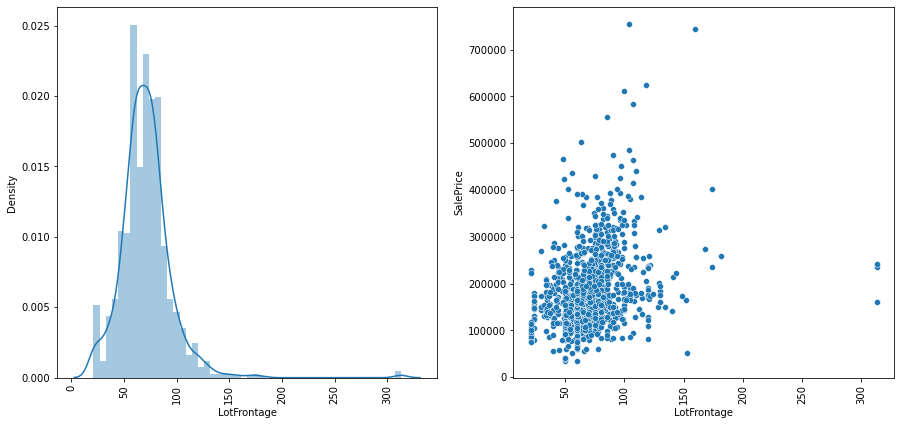

In [20]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['LotFrontage'])
plt.xlabel('LotFrontage')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'LotFrontage', y= 'SalePrice', data= train)
plt.xlabel('LotFrontage')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

5. LotArea

In [21]:
train['LotArea'].unique()

array([  4928,  15865,   9920,  11751,  16635,  14054,  11341,  13125,
         9170,   8480,   8600,   9548,   9196,   8892,  16466,  10592,
         5890,   7314,   7917,   2016,  12435,   8445,   9717,  10659,
         9230,  21000,  25339,  11394,   6380,  11988,   7658,   3378,
        18890,  12358,  14762,  10356,  10400,  12615,   7540,   9100,
        31770,  13300,   3180,   2522,   8385,   8314,   8123,  12000,
         5000,   7931,  14331,  10440,   8400,   8712,  11100,   9742,
        19900,  10186,   8765,  11923,   7200,   7838,   7024,  11287,
         8834,   5500,   9858,  32668,   8760,   8366,   9158,   6780,
         9020,   4270,  10637,  10410,  13891,  16196,   8990,   8635,
         9786,  10010,   7950,   6180,   8461,   7642,   9600,   9240,
         9525,   4923,  11075,   6820,   9204,   8973,   8125,   5330,
         5868,  11250,  22950,  11308,  10500,  13600,  10152,   4590,
         6960,  14803,   9317, 115149,   7259,   7700,   7500,  13031,
      

In [22]:
train['LotArea'].isnull().sum()

0

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['LotArea'])
plt.xlabel('LotArea')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'LotArea', y= 'SalePrice', data= train)
plt.xlabel('LotArea')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

6. Street

In [24]:
train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [25]:
train['Street'].isnull().sum()

0

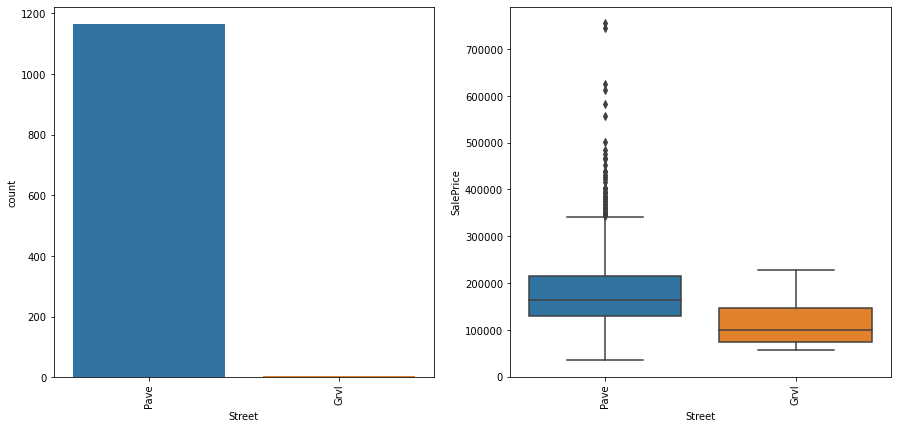

In [26]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Street'])
plt.xlabel('Street')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Street', y= 'SalePrice', data= train)
plt.xlabel('Street')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

7. Alley

In [27]:
train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [28]:
train['Alley'].isnull().sum()

1091

In [29]:
train['Alley'] = train['Alley'].fillna(method= 'bfill')
train['Alley'] = train['Alley'].fillna(method= 'ffill')

In [30]:
train['Alley'].isnull().sum()

0

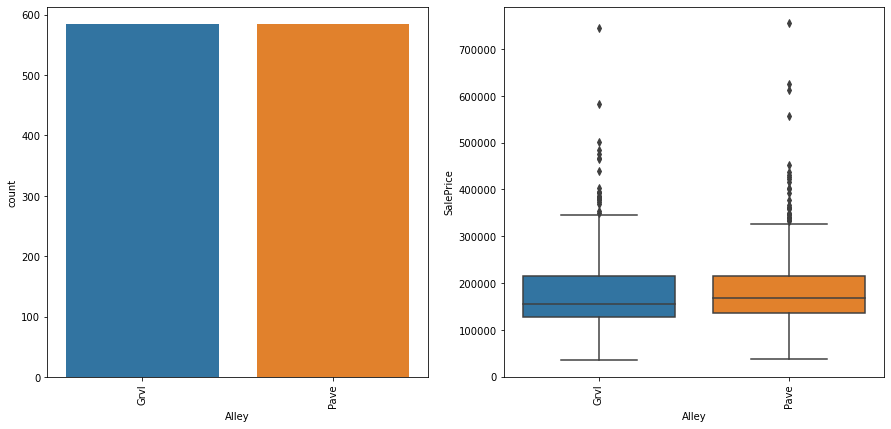

In [31]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Alley'])
plt.xlabel('Alley')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Alley', y= 'SalePrice', data= train)
plt.xlabel('Alley')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

8. LotShape

In [32]:
train['LotShape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [33]:
train['LotShape'].isnull().sum()

0

In [34]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['LotShape'])
plt.xlabel('LotShape')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'LotShape', y= 'SalePrice', data= train)
plt.xlabel('LotShape')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

9. LandContour

In [35]:
train['LandContour'].unique()

array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object)

In [36]:
train['LandContour'].isnull().sum()

0

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['LandContour'])
plt.xlabel('LandContour')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'LandContour', y= 'SalePrice', data= train)
plt.xlabel('LandContour')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

10. Utilities

In [38]:
train['Utilities'].unique()

array(['AllPub'], dtype=object)

In [39]:
train['Utilities'].isnull().sum()

0

In [40]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Utilities'])
plt.xlabel('Utilities')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Utilities', y= 'SalePrice', data= train)
plt.xlabel('Utilites')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [41]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

11. LotConfig

In [42]:
train['LotConfig'].unique()

array(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'], dtype=object)

In [43]:
train['LotConfig'].isnull().sum()

0

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['LotConfig'])
plt.xlabel('LotConfig')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'LotConfig', y= 'SalePrice', data= train)
plt.xlabel('LotConfig')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

12. LandSlope

In [45]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [46]:
train['LandSlope'].isnull().sum()

0

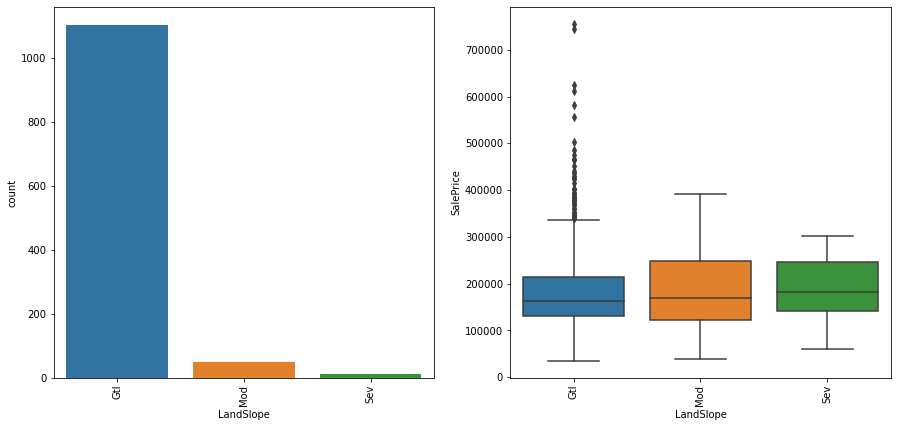

In [47]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['LandSlope'])
plt.xlabel('LandSlope')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'LandSlope', y= 'SalePrice', data= train)
plt.xlabel('LandSlope')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

13. Neighbourhood

In [48]:
train['Neighborhood'].unique()

array(['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer',
       'Edwards', 'IDOTRR', 'CollgCr', 'Mitchel', 'Crawfor', 'BrDale',
       'StoneBr', 'BrkSide', 'NridgHt', 'OldTown', 'Somerst', 'Timber',
       'SWISU', 'SawyerW', 'ClearCr', 'Veenker', 'Blmngtn', 'MeadowV',
       'Blueste'], dtype=object)

In [49]:
train['Neighborhood'].isnull().sum()

0

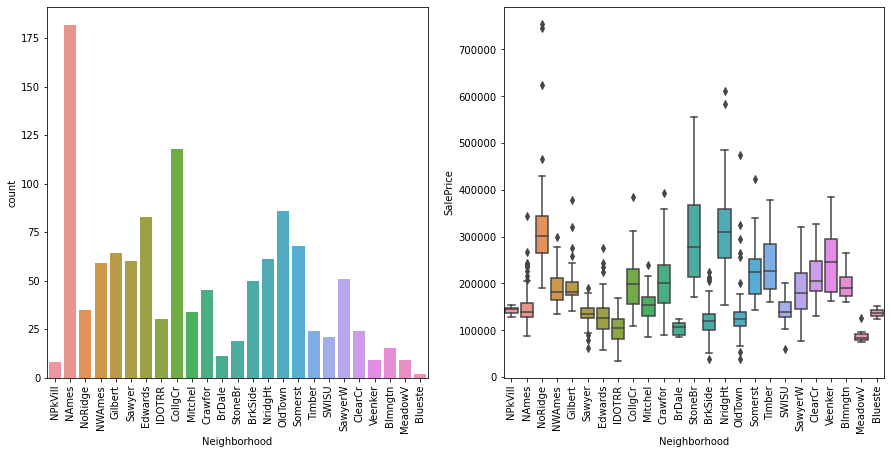

In [50]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Neighborhood'])
plt.xlabel('Neighborhood')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Neighborhood', y= 'SalePrice', data= train)
plt.xlabel('Neighborhood')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

14. Condition1

In [51]:
train['Condition1'].unique()

array(['Norm', 'Feedr', 'RRAn', 'PosA', 'RRAe', 'Artery', 'PosN', 'RRNe',
       'RRNn'], dtype=object)

In [52]:
train['Condition1'].isnull().sum()

0

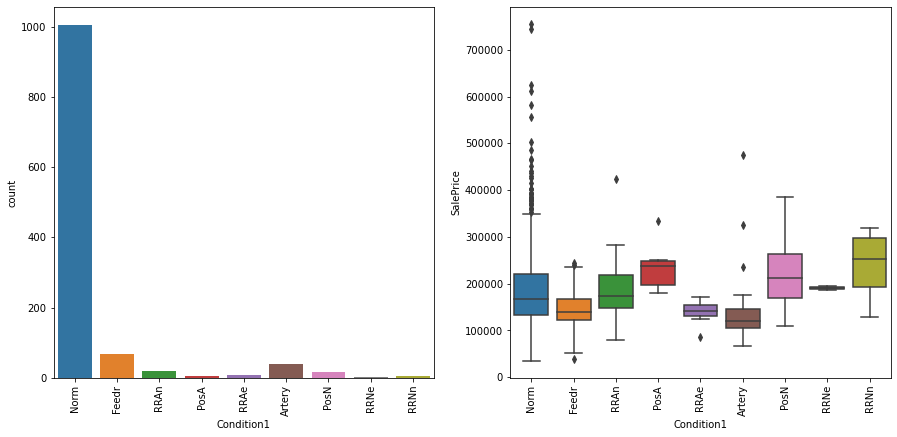

In [53]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Condition1'])
plt.xlabel('Condition1')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Condition1', y= 'SalePrice', data= train)
plt.xlabel('Condition1')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

15. Condition2

In [54]:
train['Condition2'].unique()

array(['Norm', 'RRAe', 'Feedr', 'PosN', 'Artery', 'RRNn', 'PosA', 'RRAn'],
      dtype=object)

In [55]:
train['Condition2'].isnull().sum()

0

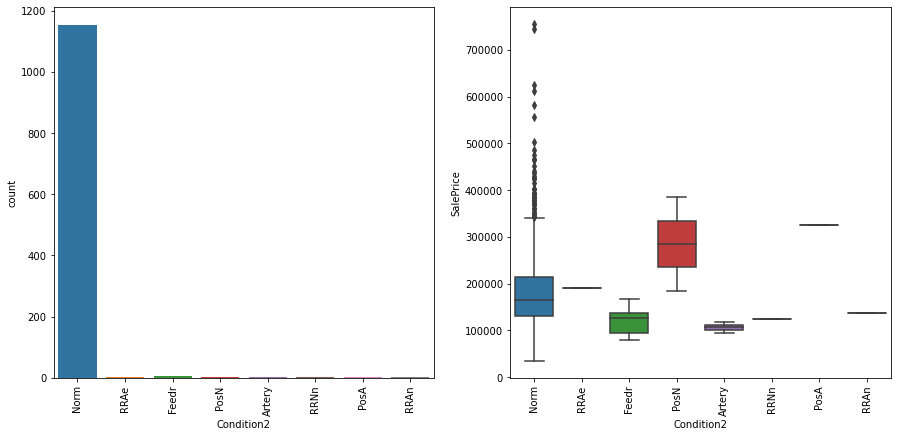

In [56]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Condition2'])
plt.xlabel('Condition2')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Condition2', y= 'SalePrice', data= train)
plt.xlabel('Condition2')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

16. BldgType

In [57]:
train['BldgType'].unique()

array(['TwnhsE', '1Fam', 'Duplex', 'Twnhs', '2fmCon'], dtype=object)

In [58]:
train['BldgType'].isnull().sum()

0

In [59]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BldgType'])
plt.xlabel('BldgType')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BldgType', y= 'SalePrice', data= train)
plt.xlabel('BldgType')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

17. HouseStyle

In [60]:
train['HouseStyle'].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Fin',
       '2.5Unf'], dtype=object)

In [61]:
train['HouseStyle'].isnull().sum()

0

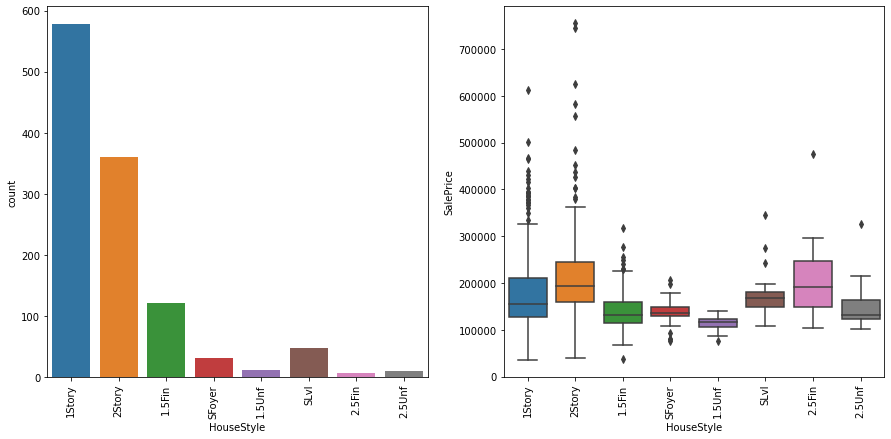

In [62]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['HouseStyle'])
plt.xlabel('HouseStyle')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'HouseStyle', y= 'SalePrice', data= train)
plt.xlabel('HouseStyle')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

18. OverallQual

In [63]:
train['OverallQual'].unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [64]:
train['OverallQual'].isnull().sum()

0

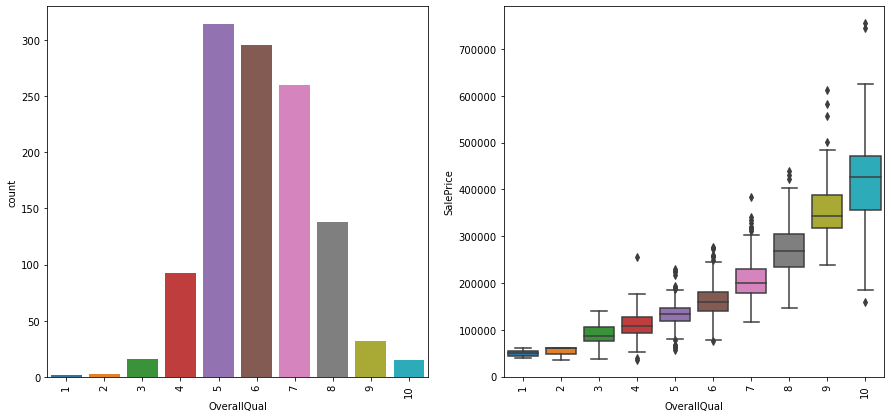

In [65]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['OverallQual'])
plt.xlabel('OverallQual')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'OverallQual', y= 'SalePrice', data= train)
plt.xlabel('OverallQual')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

19. OverallCond

In [66]:
train['OverallCond'].unique()

array([5, 6, 7, 4, 8, 2, 3, 9, 1], dtype=int64)

In [67]:
train['OverallCond'].isnull().sum()

0

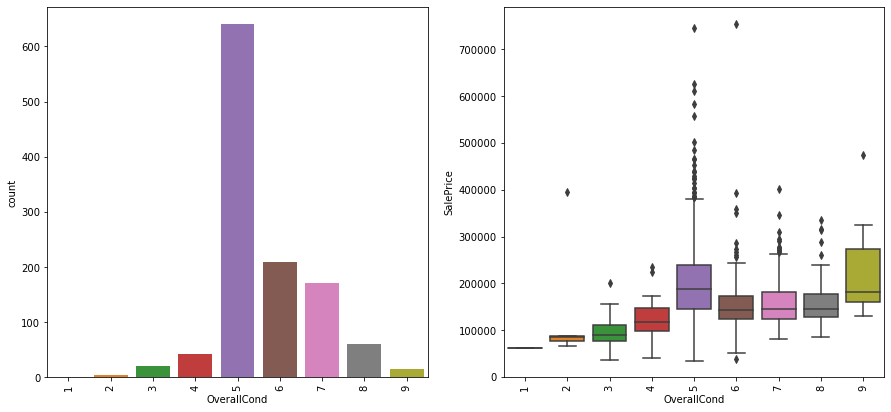

In [68]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['OverallCond'])
plt.xlabel('OverallCond')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'OverallCond', y= 'SalePrice', data= train)
plt.xlabel('OverallCond')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

20. YearBuilt

In [69]:
train['YearBuilt'].unique()

array([1976, 1970, 1996, 1977, 2006, 1957, 1965, 1947, 1937, 2003, 1960,
       1955, 1923, 1930, 2007, 2001, 1972, 1950, 1961, 1953, 1918, 2010,
       1922, 1934, 2005, 1946, 1941, 1948, 1975, 1978, 1956, 2004, 1982,
       2000, 2002, 1920, 1992, 1936, 1967, 1989, 1929, 1968, 1959, 1935,
       1966, 1931, 1916, 1998, 1962, 1974, 1926, 1904, 1995, 1969, 1985,
       1963, 1958, 1892, 2008, 1971, 1980, 1945, 1986, 1981, 1949, 1940,
       1954, 1925, 1915, 1921, 1924, 1999, 1951, 1993, 1964, 1900, 1919,
       1910, 1938, 1880, 1988, 1911, 1990, 1979, 1927, 1983, 1994, 2009,
       1928, 1917, 1898, 1997, 1984, 1973, 1952, 1939, 1987, 1890, 1942,
       1991, 1932, 1908, 1914, 1882, 1905, 1875, 1906, 1893, 1912, 1913],
      dtype=int64)

In [70]:
train['YearBuilt'].isnull().sum()

0

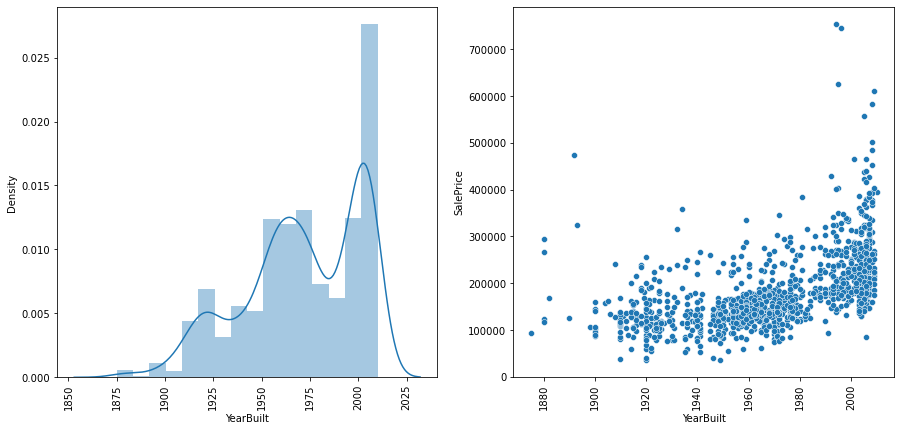

In [71]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['YearBuilt'])
plt.xlabel('YearBuilt')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'YearBuilt', y= 'SalePrice', data= train)
plt.xlabel('YearBuilt')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [72]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

21. YearRemodAdd

In [73]:
train['YearRemodAdd'].unique()

array([1976, 1970, 1997, 1977, 2000, 2006, 1996, 1965, 1950, 2003, 1960,
       1955, 2007, 2001, 1961, 1998, 1953, 2010, 1995, 2005, 1992, 1975,
       1978, 1982, 2002, 1989, 1967, 1968, 1959, 2004, 1966, 2008, 1987,
       1981, 1969, 1985, 1963, 1991, 1993, 1971, 1990, 1956, 1986, 1999,
       1954, 1957, 1994, 1972, 1958, 1980, 1979, 1951, 1983, 2009, 1962,
       1964, 1952, 1984, 1988, 1974, 1973], dtype=int64)

In [74]:
train['YearRemodAdd'].isnull().sum()

0

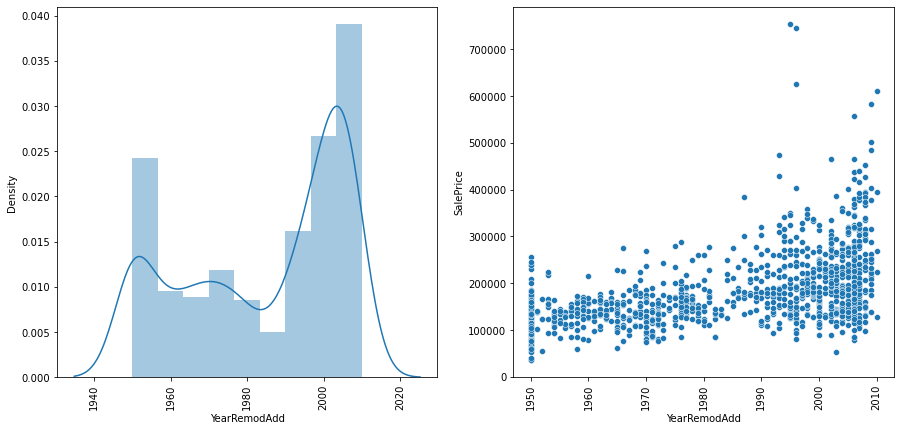

In [75]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['YearRemodAdd'])
plt.xlabel('YearRemodAdd')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'YearRemodAdd', y= 'SalePrice', data= train)
plt.xlabel('YearRemodAdd')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

22. RoofStyle

In [76]:
train['RoofStyle'].unique()

array(['Gable', 'Flat', 'Hip', 'Shed', 'Gambrel', 'Mansard'], dtype=object)

In [77]:
train['RoofStyle'].isnull().sum()

0

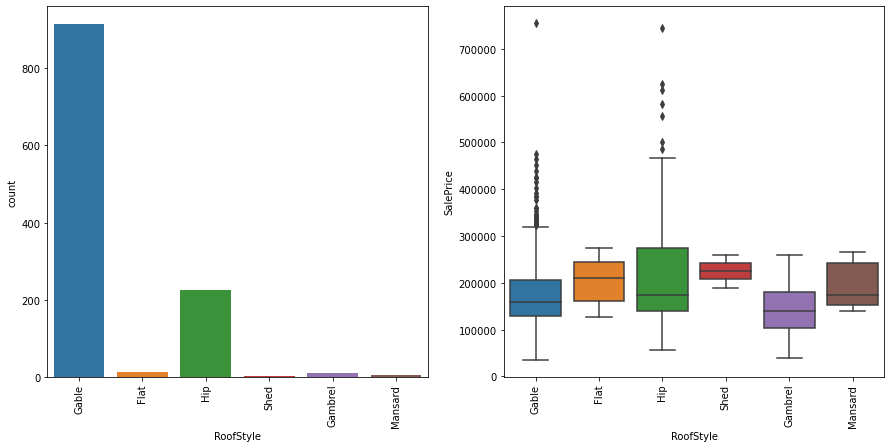

In [78]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['RoofStyle'])
plt.xlabel('RoofStyle')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'RoofStyle', y= 'SalePrice', data= train)
plt.xlabel('RoofStyle')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

23. RoofMatl

In [79]:
train['RoofMatl'].unique()

array(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Roll', 'ClyTile',
       'Metal', 'Membran'], dtype=object)

In [80]:
train['RoofMatl'].isnull().sum()

0

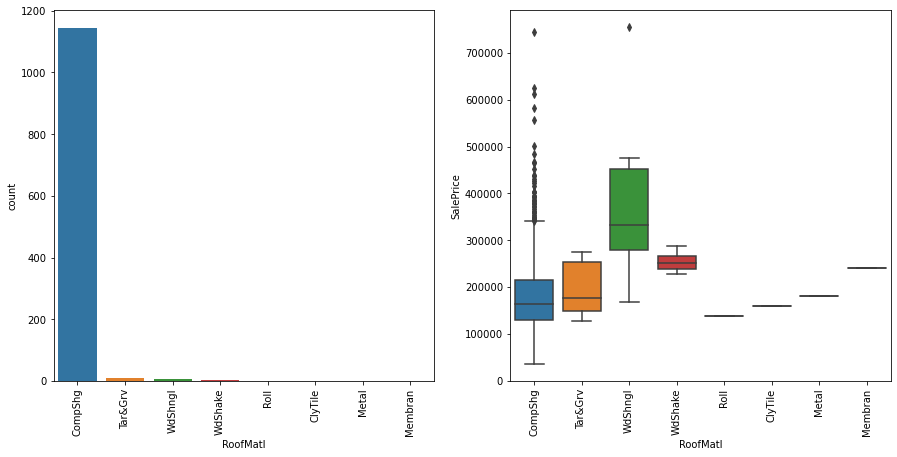

In [81]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['RoofMatl'])
plt.xlabel('RoofMatl')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'RoofMatl', y= 'SalePrice', data= train)
plt.xlabel('RoofMatl')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

24. Exterior1st

In [82]:
train['Exterior1st'].unique()

array(['Plywood', 'Wd Sdng', 'MetalSd', 'CemntBd', 'VinylSd', 'HdBoard',
       'Stucco', 'WdShing', 'BrkFace', 'Stone', 'AsbShng', 'AsphShn',
       'ImStucc', 'BrkComm'], dtype=object)

In [83]:
train['Exterior1st'].isnull().sum()

0

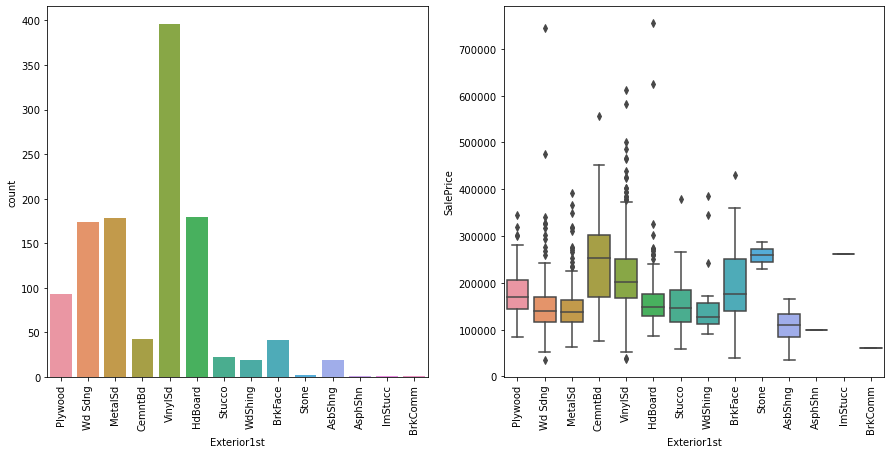

In [84]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Exterior1st'])
plt.xlabel('Exterior1st')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Exterior1st', y= 'SalePrice', data= train)
plt.xlabel('Exterior1st')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

25. Exterior2nd

In [85]:
train['Exterior2nd'].unique()

array(['Plywood', 'Wd Sdng', 'MetalSd', 'CmentBd', 'VinylSd', 'HdBoard',
       'Wd Shng', 'Stucco', 'ImStucc', 'Stone', 'BrkFace', 'AsbShng',
       'Brk Cmn', 'AsphShn', 'Other'], dtype=object)

In [86]:
train['Exterior2nd'].isnull().sum()

0

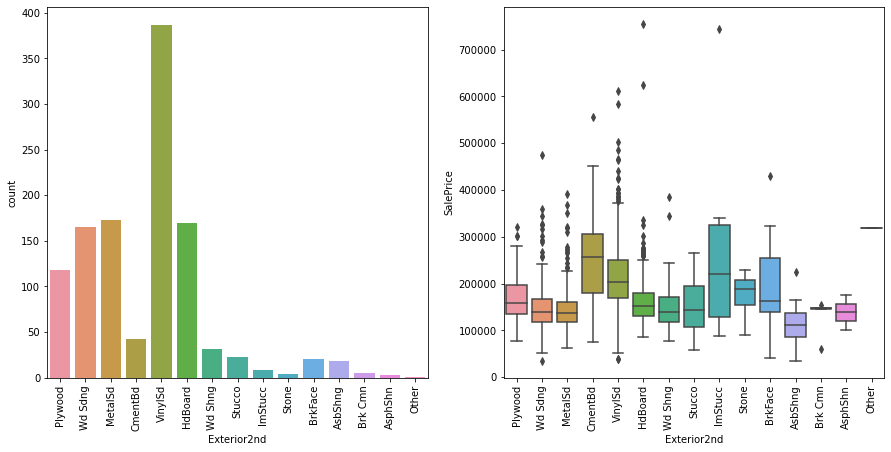

In [87]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Exterior2nd'])
plt.xlabel('Exterior2nd')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Exterior2nd', y= 'SalePrice', data= train)
plt.xlabel('Exterior2nd')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

26. MasVnrType

In [88]:
train['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [89]:
train['MasVnrType'].isnull().sum()

7

In [90]:
train['MasVnrType'] = train['MasVnrType'].fillna(method= 'bfill')
train['MasVnrType'] = train['MasVnrType'].fillna(method= 'ffill')

In [91]:
train['MasVnrType'].isnull().sum()

0

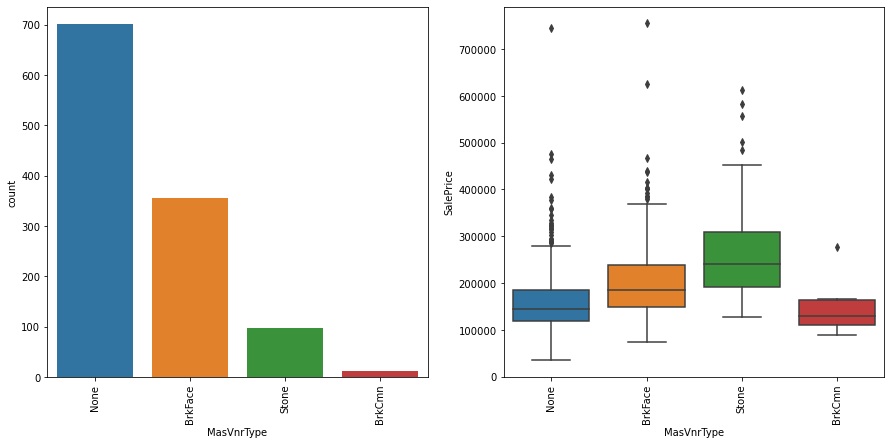

In [92]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MasVnrType'])
plt.xlabel('MasVnrType')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MasVnrType', y= 'SalePrice', data= train)
plt.xlabel('MasVnrType')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

27. MasVnrArea

In [93]:
train['MasVnrArea'].unique()

array([0.000e+00, 4.800e+02, 1.260e+02, 1.800e+02, 6.700e+01, 2.230e+02,
       6.600e+01, 8.200e+01, 1.740e+02, 3.040e+02, 1.720e+02, 1.660e+02,
       1.840e+02, 3.500e+02, 4.120e+02, 1.000e+00, 1.890e+02, 1.120e+02,
       5.000e+01, 2.200e+02, 1.600e+01, 6.300e+02, 2.810e+02, 2.870e+02,
       3.400e+02, 2.160e+02,       nan, 1.400e+02, 1.830e+02, 3.360e+02,
       3.960e+02, 2.320e+02, 3.200e+02, 8.500e+01, 1.620e+02, 1.540e+02,
       1.760e+02, 1.200e+02, 1.080e+02, 2.520e+02, 1.300e+02, 3.510e+02,
       5.710e+02, 5.300e+01, 2.040e+02, 9.750e+02, 6.530e+02, 8.000e+01,
       4.720e+02, 3.400e+01, 1.650e+02, 2.370e+02, 1.130e+02, 9.000e+01,
       1.600e+02, 1.470e+02, 1.360e+02, 3.760e+02, 8.900e+01, 4.150e+02,
       2.000e+02, 5.060e+02, 2.860e+02, 4.500e+01, 2.450e+02, 2.470e+02,
       2.400e+02, 7.000e+01, 9.800e+01, 6.040e+02, 8.600e+02, 2.700e+01,
       1.530e+02, 2.120e+02, 2.060e+02, 7.600e+02, 2.960e+02, 5.280e+02,
       2.990e+02, 3.380e+02, 1.230e+02, 2.330e+02, 

In [94]:
train['MasVnrArea'].isnull().sum()

7

In [95]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(method= 'bfill')
train['MasVnrArea'] = train['MasVnrArea'].fillna(method= 'ffill')

In [96]:
train['MasVnrArea'].isnull().sum()

0

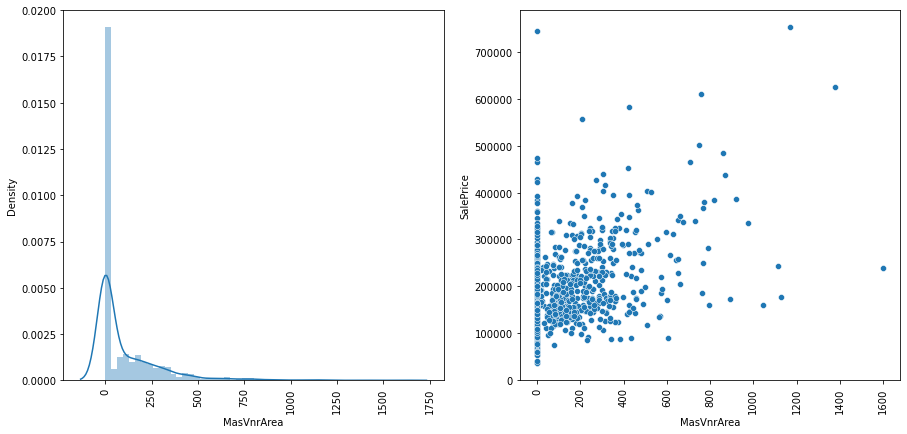

In [97]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['MasVnrArea'])
plt.xlabel('MasVnrArea')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'MasVnrArea', y= 'SalePrice', data= train)
plt.xlabel('MasVnrArea')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

28. ExterQual

In [98]:
train['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [99]:
train['ExterQual'].isnull().sum()

0

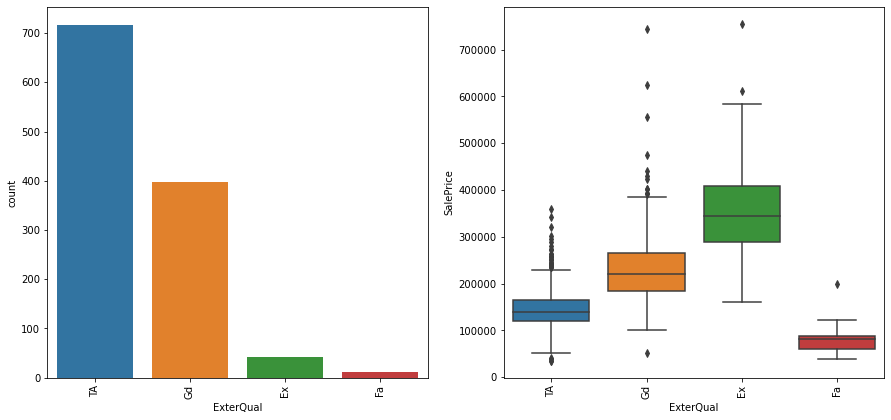

In [100]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['ExterQual'])
plt.xlabel('ExterQual')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'ExterQual', y= 'SalePrice', data= train)
plt.xlabel('ExterQual')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

29. ExterCond

In [101]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [102]:
train['ExterCond'].isnull().sum()

0

In [103]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['ExterCond'])
plt.xlabel('ExterCond')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'ExterCond', y= 'SalePrice', data= train)
plt.xlabel('ExterCond')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

30. Foundation

In [104]:
train['Foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [105]:
train['Foundation'].isnull().sum()

0

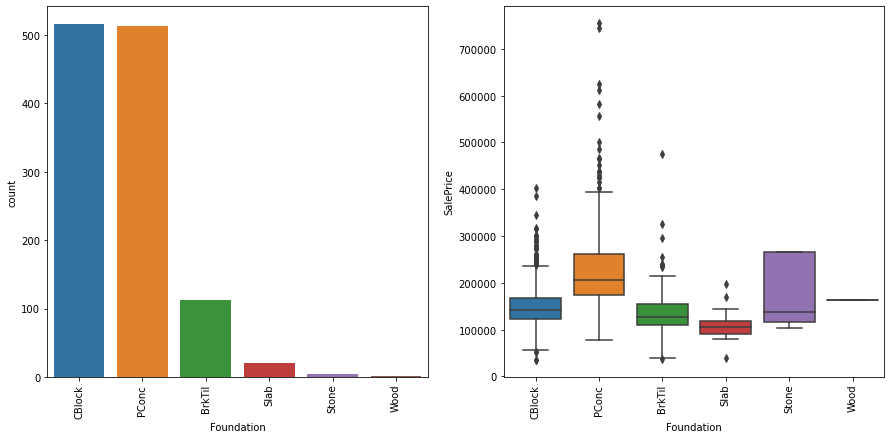

In [106]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Foundation'])
plt.xlabel('Foundation')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Foundation', y= 'SalePrice', data= train)
plt.xlabel('Foundation')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [107]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

31. BsmtQual

In [108]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [109]:
train['BsmtQual'].isnull().sum()

30

In [110]:
train['BsmtQual'] = train['BsmtQual'].fillna(method= 'bfill')
train['BsmtQual'] = train['BsmtQual'].fillna(method= 'ffill')

In [111]:
train['BsmtQual'].isnull().sum()

0

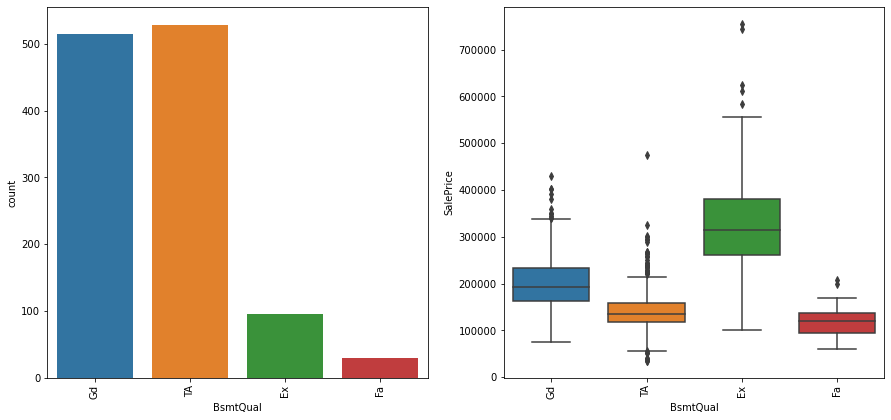

In [112]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtQual'])
plt.xlabel('BsmtQual')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtQual', y= 'SalePrice', data= train)
plt.xlabel('BsmtQual')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

32. BsmtCond

In [113]:
train['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [114]:
train['BsmtCond'].isnull().sum()

30

In [115]:
train['BsmtCond'] = train['BsmtCond'].fillna(method= 'bfill')
train['BsmtCond'] = train['BsmtCond'].fillna(method= 'ffill')

In [116]:
train['BsmtCond'].isnull().sum()

0

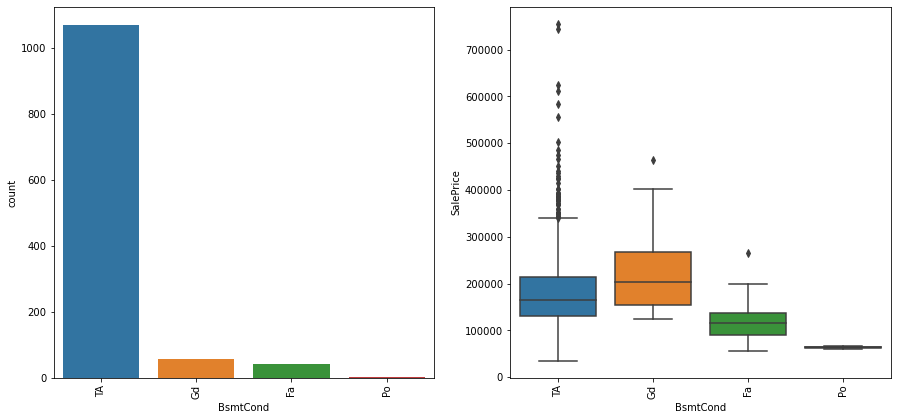

In [117]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtCond'])
plt.xlabel('BsmtCond')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtCond', y= 'SalePrice', data= train)
plt.xlabel('BsmtCond')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

33. BsmtExposure

In [118]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [119]:
train['BsmtExposure'].isnull().sum()

31

In [120]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(method= 'bfill')
train['BsmtExposure'] = train['BsmtExposure'].fillna(method= 'ffill')

In [121]:
train['BsmtExposure'].isnull().sum()

0

In [122]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtExposure'])
plt.xlabel('BsmtExposure')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtExposure', y= 'SalePrice', data= train)
plt.xlabel('BsmtExposure')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

34. BsmtFinType1

In [123]:
train['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [124]:
train['BsmtFinType1'].isnull().sum()

30

In [125]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(method= 'bfill')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(method= 'ffill')

In [126]:
train['BsmtFinType1'].isnull().sum()

0

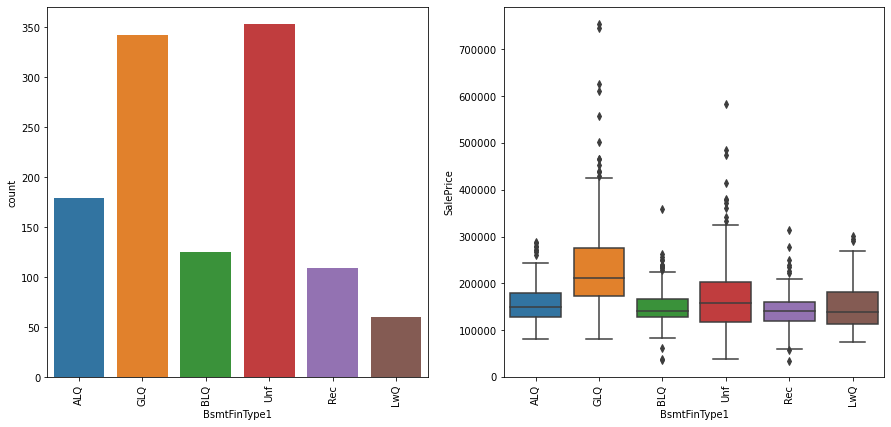

In [127]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtFinType1'])
plt.xlabel('BsmtFinType1')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtFinType1', y= 'SalePrice', data= train)
plt.xlabel('BsmtFinType1')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

35. BsmtFinSF1

In [128]:
train['BsmtFinSF1'].unique()

array([ 120,  351,  862,  705, 1246,    0, 1302,  168,  698,  442,  483,
        538,  724,  751,  361,  656,   49,  915,  661,   35, 1445,  326,
        456,  498,  360,  716,  477,  773,  639,  377,  595,  546,  144,
        374, 1274,  493,  290,  860,  912,  674,  285,  769, 1024,  421,
        338, 1170,  234,  510, 1219,  490,  312,  544, 1288,  116, 1386,
       1443,  336,  600, 1071,  535,  280, 1153,  562,  368,   25,  567,
       1196,  248,  486,  936,  432,  454,  586,   24,  375,  416,  774,
        680,  592, 1810, 1373,  637,  196,  197,  552,   16,  904,  428,
        189,  854, 2096,  216,  504, 1218,  978,  713,  784,   72,  795,
        810,  633, 1148,  988,  765,  697,  733,  603,  572,  300,  180,
        471,  450,  296,  400,  969, 1039,  767,  740,  419,  831,  689,
        998, 1070,  427,  865,  626,  922,  388,  236,  297,  611,  228,
       1258,  852,  522,  609,   20,  641, 1022,  250, 1106,  301,  746,
        358,  821,  560,   75,  704, 2188,  958, 11

In [129]:
train['BsmtFinSF1'].isnull().sum()

0

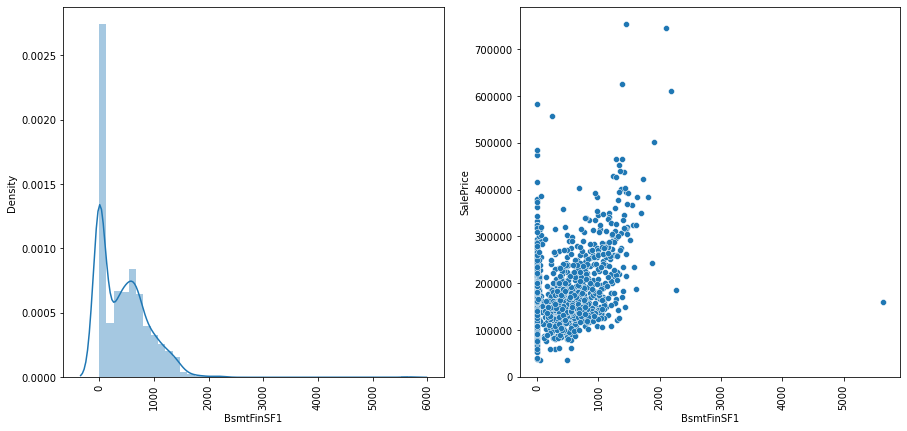

In [130]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['BsmtFinSF1'])
plt.xlabel('BsmtFinSF1')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'BsmtFinSF1', y= 'SalePrice', data= train)
plt.xlabel('BsmtFinSF1')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

36. BsmtFinType2

In [131]:
train['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [132]:
train['BsmtFinType2'].isnull().sum()

31

In [133]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(method= 'bfill')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(method= 'ffill')

In [134]:
train['BsmtFinType2'].isnull().sum()

0

In [135]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtFinType2'])
plt.xlabel('BsmtFinType2')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtFinType2', y= 'SalePrice', data= train)
plt.xlabel('BsmtFinType2')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

37. BsmtFinSF2

In [136]:
train['BsmtFinSF2'].unique()

array([   0,  823,  682,   96, 1029,  869,  211,  608,  532,  466,  692,
        539,   41,  123,  193, 1120,  872,   28,  240,  239,  150,  181,
        180,  661,  258,  486,  374,  547,   93,  230,  306,  294,  108,
        380,   68,  396,  279,  324,  791,  479,  228,  110,  690,  290,
        121,   40,  531,  362,   80,  634,  106,  128,  391,  336,  472,
         35,  435,  182,  132,  495,  438,  287,   64,  168,  764, 1031,
        210,  202, 1127,  469, 1080,  149,  670,  468,  723,  645,  411,
        232, 1474,  177,  768,  127,  500,  620,  144,  441,   81, 1061,
        344,  375,  219,  612,  125,  480, 1063,  906,  311,  627,  117,
        208,  551,  147,  173,  264, 1057,  377,  630,  276,  580,  712,
        139,  544,  606,  972,  334,   32,  163,  184,  175,  841,  400,
        546], dtype=int64)

In [137]:
train['BsmtFinSF2'].isnull().sum()

0

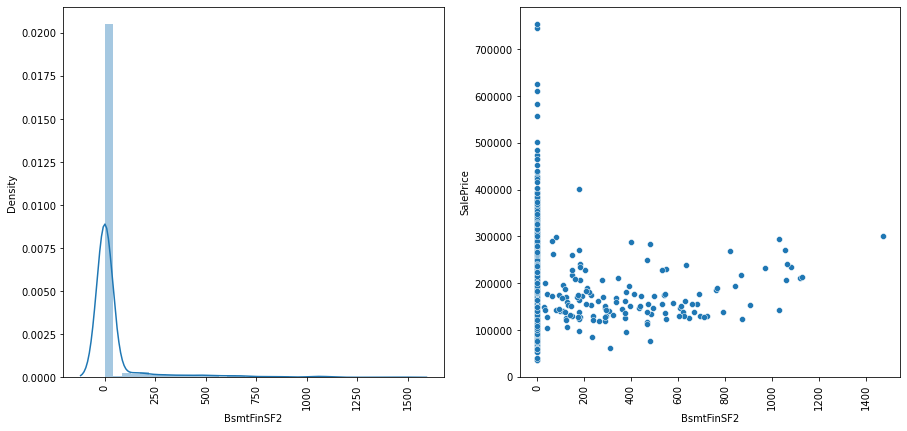

In [138]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['BsmtFinSF2'])
plt.xlabel('BsmtFinSF2')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'BsmtFinSF2', y= 'SalePrice', data= train)
plt.xlabel('BsmtFinSF2')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

38. BsmtUnfSF

In [139]:
train['BsmtUnfSF'].unique()

array([ 958, 1043,  255, 1139,  356,  879,   90,  284,  420,  390,  780,
        458, 1560, 1065,  816,  602,  278,  508,  392,  630,  112,    0,
        135,  203,  905,  411,  993,  389, 1296,  651,  652,  360,  253,
       1090,  725,  115,  742,  441,  551,  600,  970,  270,  982,  172,
        363,  526, 1017,  132, 1777, 1035,   76,  666, 1800,   95,  108,
        386,  121,  292,  354, 1194,  798, 1496,   30,  276,  417,  660,
        604,  690,   39, 1498,  295,  312,  195,  155,  960,  728,  912,
        752,  650, 1055, 1099,  440,   29,  247,  413,  813,  298,  448,
        434, 1107,  168,  432,  314,  462, 1530,  250,  409, 1290,  424,
        104,  756,  400,   99, 1074,   32,  221,  858,  319, 1442,  844,
        999,  342, 1550,  893,  712,  536,  884,  628, 1128,  371,  300,
       1686,  540,  506,  163,  864,  733, 1393, 1319,  726,  586,  481,
        264,  721,  398,  252,  180,  151, 1212,  701,  572,  765,  849,
        340,  294,  414,  859,  230,  380,  796,  8

In [140]:
train['BsmtUnfSF'].isnull().sum()

0

In [141]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['BsmtUnfSF'])
plt.xlabel('BsmtUnfSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'BsmtUnfSF', y= 'SalePrice', data= train)
plt.xlabel('BsmtUnfSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

39. TotalBsmtSF

In [142]:
train['TotalBsmtSF'].unique()

array([1078, 2217, 1117, 1844, 1602,  879, 1392, 1134, 1214,  832,  780,
        941, 1560, 1065,  816,  602, 1232, 1143,  630,  963,  768, 1050,
        864, 1809, 1856,  993,  715, 1752,  651, 1361,  720,    0,  969,
       1090, 1202,  888,  742, 1080,  928,  600,  970,  985,  982,  924,
       1269, 1800, 1510,  290,  992, 1777, 1947,  750,  951, 1132,  807,
        925, 1462,  926, 2035, 1194,  798, 1496,  520, 1127,  544, 1705,
        660, 2076, 1482, 1498,  672,  912, 1389,  690,  960,  728, 1032,
        650, 1055, 1099, 1593,  784, 1488, 1144, 1008,  813, 1494,  936,
        920, 1107, 1104, 1048, 1554,  825, 1314, 1643, 1028,  756,  691,
       1074, 1842, 1594,  858,  637,  319, 1442, 1040,  644, 1196,  894,
       1574,  893, 1440,  608,  884, 1478, 1128, 1225, 2396, 1686, 1010,
       1518, 1262,  876, 1063,  795, 1393, 1319, 1536, 1219, 1505,  721,
       1148, 1386, 1017,  900,  848, 1337, 1212, 1304, 1486,  765,  859,
       1073,  796,  804,  622, 1428, 1247, 1126, 11

In [143]:
train['TotalBsmtSF'].isnull().sum()

0

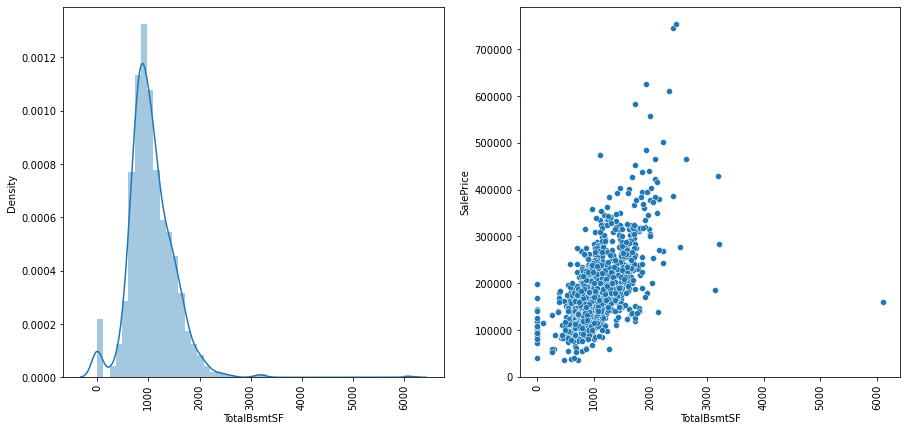

In [144]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['TotalBsmtSF'])
plt.xlabel('TotalBsmtSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'TotalBsmtSF', y= 'SalePrice', data= train)
plt.xlabel('TotalBsmtSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

40. Heating

In [145]:
train['Heating'].unique()

array(['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav'], dtype=object)

In [146]:
train['Heating'].isnull().sum()

0

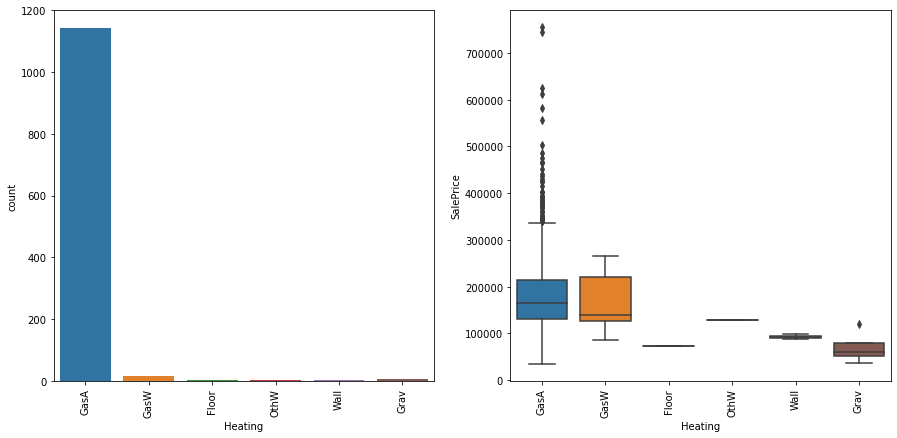

In [147]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Heating'])
plt.xlabel('Heating')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Heating', y= 'SalePrice', data= train)
plt.xlabel('Heating')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [148]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

41. HeatingQC

In [149]:
train['HeatingQC'].unique()

array(['TA', 'Ex', 'Gd', 'Fa', 'Po'], dtype=object)

In [150]:
train['HeatingQC'].isnull().sum()

0

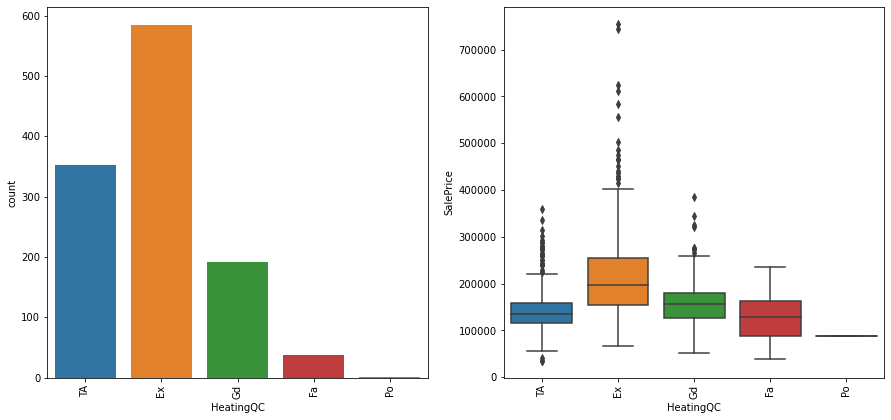

In [151]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['HeatingQC'])
plt.xlabel('HeatingQC')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'HeatingQC', y= 'SalePrice', data= train)
plt.xlabel('HeatingQC')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

42. CentralAir

In [152]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [153]:
train['CentralAir'].isnull().sum()

0

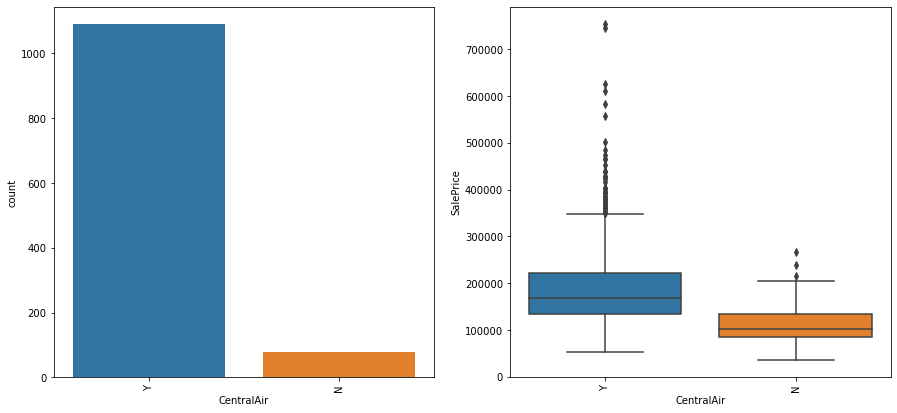

In [154]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['CentralAir'])
plt.xlabel('CentralAir')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'CentralAir', y= 'SalePrice', data= train)
plt.xlabel('CentralAir')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

43. Electrical

In [155]:
train['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], dtype=object)

In [156]:
train['Electrical'].isnull().sum()

0

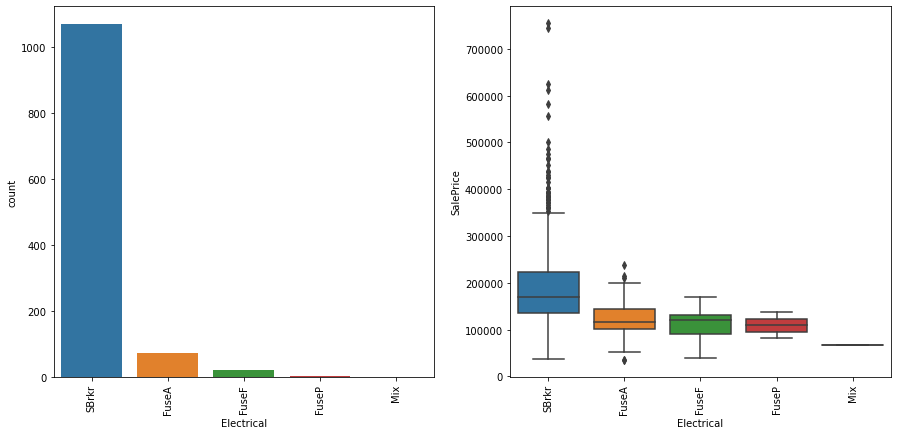

In [157]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Electrical'])
plt.xlabel('Electrical')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Electrical', y= 'SalePrice', data= train)
plt.xlabel('Electrical')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

44. 1stFlrSF

In [158]:
train['1stFlrSF'].unique()

array([ 958, 2217, 1127, 1844, 1602,  879, 1392, 1803, 1214,  832,  780,
        941, 1560, 1065,  872,  900,  816, 1232, 1113,  630,  963,  768,
       1078, 1050, 1200, 2259, 1416, 1856, 1048,  849, 1752,  707, 1361,
        854, 1547,  969, 1370, 2158,  912,  779, 1656,  928,  520,  970,
        985, 1007, 1122,  334, 1269, 1800, 1584,  438, 1306,  930, 1795,
       2207, 1061,  951,  827, 1132, 1175,  925, 1462,  926,  874, 2515,
       1194,  798, 1496, 1165,  774, 1718,  808,  803, 2076, 1494, 1498,
       1072, 1085, 1389,  698,  986, 1040,  728, 1032, 1055, 1099, 1593,
       1168, 1502, 2020, 1144, 1053,  822, 1652,  936,  920, 1518, 1130,
        864, 1186, 1554, 1097, 1314,  888, 1824, 1436, 1051, 1080,  691,
       1088, 1842, 1646,  897, 1035, 1442, 1196,  894, 1574,  901,  600,
       1476, 1319,  884,  882, 1478, 1149, 1276, 2411, 1707,  961, 1052,
       1262,  964,  784, 1287, 1468, 1422, 1537, 1536,  904, 1265, 1505,
        720,  841, 1148, 1569, 1026,  848, 1337, 12

In [159]:
train['1stFlrSF'].isnull().sum()

0

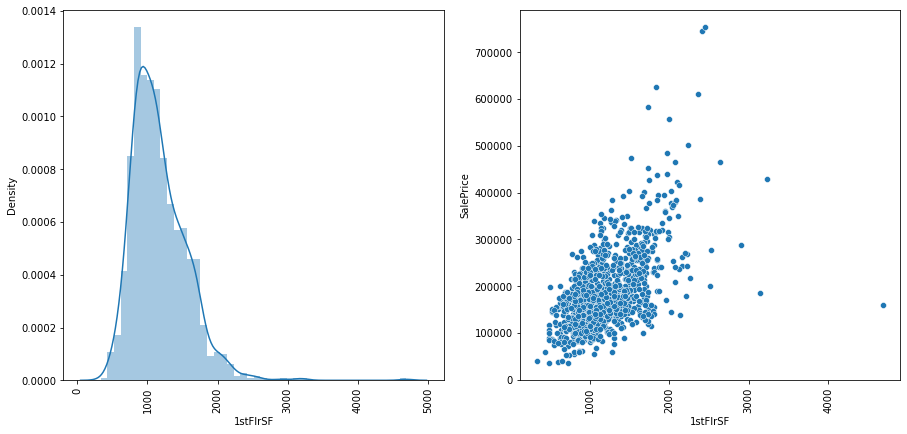

In [160]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['1stFlrSF'])
plt.xlabel('1stFlrSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= '1stFlrSF', y= 'SalePrice', data= train)
plt.xlabel('1stFlrSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

45. 2ndFlrSF

In [161]:
train['2ndFlrSF'].unique()

array([   0,  886,  984,  384,  596,  888,  521,  602,  672,  829,  811,
        682, 1259,  720,  600,  739,  793, 1208,  862,  807,  762,  842,
        704,  213,  649,  728,  514,  220,  581,  800,  843,  866, 1518,
       1054,  896,  676,  884,  788,  439,  371,  678,  547,  900,  809,
        677, 1151, 1141, 1336, 2065,  756,  864,  795, 1177,  981,  983,
        595,  319,  813,  748,  622,  527, 1304, 1818, 1142,  940,  872,
        403, 1182,  495,  913, 1020,  192, 1349,  656,  504, 1174,  539,
        741,  623,  846,  857,  730,  924,  472,  796,  790, 1323,  685,
       1218,  336, 1063, 1523, 1122,  871,  611, 1053,  684,  568, 1001,
        546,  840, 1194,  628,  464,  661,  876,  742,  626,  848,  744,
       1370,  992,  358,  883, 1101,  783,  941,  432, 1093,  709,  475,
        378,  530,  850,  764, 1538,  325, 1112,  903,  590,  441,  806,
        561, 1070,  928,  665,  918, 1357, 1312, 1017,  729,  780, 1040,
        368, 1540,  767, 1031,  844,  689,  592,  8

In [162]:
train['2ndFlrSF'].isnull().sum()

0

In [163]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['2ndFlrSF'])
plt.xlabel('2ndFlrSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= '2ndFlrSF', y= 'SalePrice', data= train)
plt.xlabel('2ndFlrSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

46. LowQualFinSF

In [164]:
train['LowQualFinSF'].unique()

array([  0, 528,  53, 156,  80, 390, 234, 144, 572, 360, 514, 120, 384,
       515, 481, 513, 232, 371, 473, 420, 392], dtype=int64)

In [165]:
train['LowQualFinSF'].isnull().sum()

0

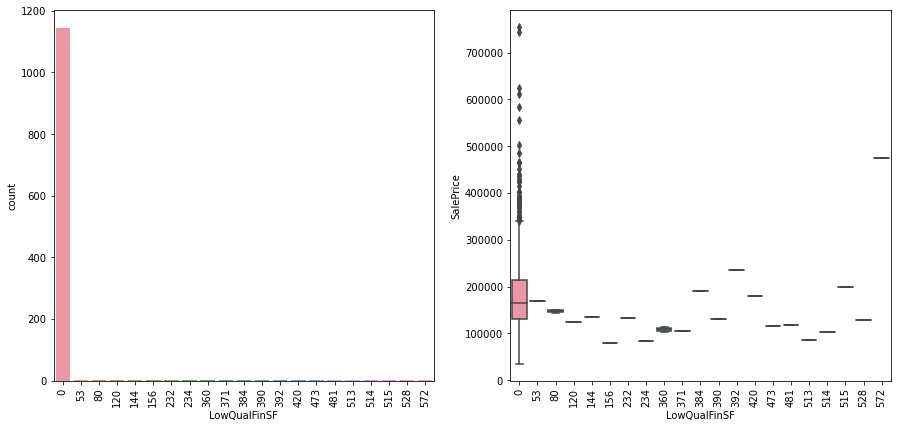

In [166]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['LowQualFinSF'])
plt.xlabel('LowQualFinSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'LowQualFinSF', y= 'SalePrice', data= train)
plt.xlabel('LowQualFinSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

47. GrLivArea

In [167]:
train['GrLivArea'].unique()

array([ 958, 2217, 2013, 1844, 1602, 1863, 1392, 1803, 1214, 1216, 1376,
       1829, 1560, 1065, 1393, 1502,  816, 1232, 1113, 1302, 1792,  768,
       1078, 1050, 1200, 2259, 1416, 1856, 1048, 1660, 1752, 1389, 2620,
       1382, 2320,  969, 1370, 2158,  912,  935, 1656,  928, 1709,  985,
       1800, 1122,  334, 1269, 2792,  438, 1306,  930, 1795, 2207, 1923,
        951,  827,  900, 1132, 1982,  925, 2224, 1316,  874, 2515, 1194,
       1640, 1496,  754, 1165,  774, 1718,  803, 2076, 1494, 1498, 1285,
       1734, 1426,  986, 1040, 1456, 1252, 1539, 2263, 1099, 1593, 1968,
       2020, 1144, 1053, 1665, 1652,  936, 1786, 3608, 2184,  864, 1986,
       1554, 1993, 1314, 1564, 1824, 1839, 1080, 1088, 1842, 1646,  872,
       1336, 1406, 1442, 1846, 1355, 1196,  894, 1574, 1801, 1641, 2153,
       1319, 2035,  882, 1478, 2290, 2612, 4476, 1707, 1717, 1052, 1518,
       1262,  964, 1728,  784, 1287, 2599, 1537, 1536,  904, 1265, 1505,
        720,  841, 1148, 1569, 2007,  848, 1337, 12

In [168]:
train['GrLivArea'].isnull().sum()

0

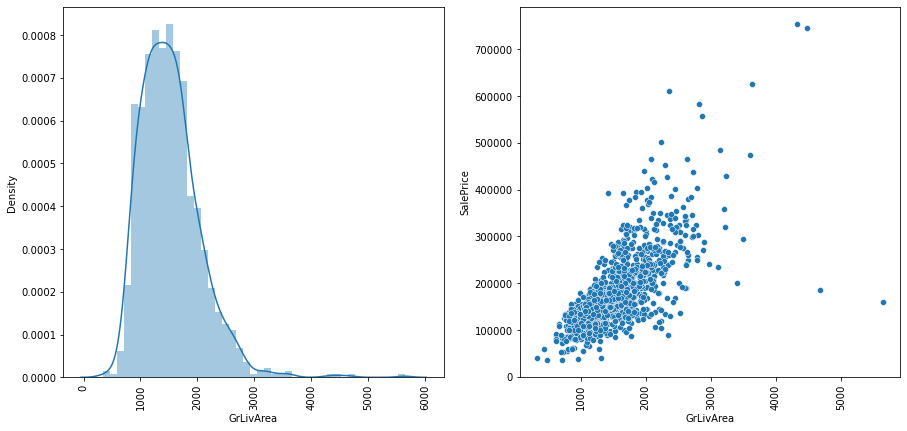

In [169]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['GrLivArea'])
plt.xlabel('GrLivArea')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'GrLivArea', y= 'SalePrice', data= train)
plt.xlabel('GrLivArea')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

48. BsmtFullBath

In [170]:
train['BsmtFullBath'].unique()

array([0, 1, 2, 3], dtype=int64)

In [171]:
train['BsmtFullBath'].isnull().sum()

0

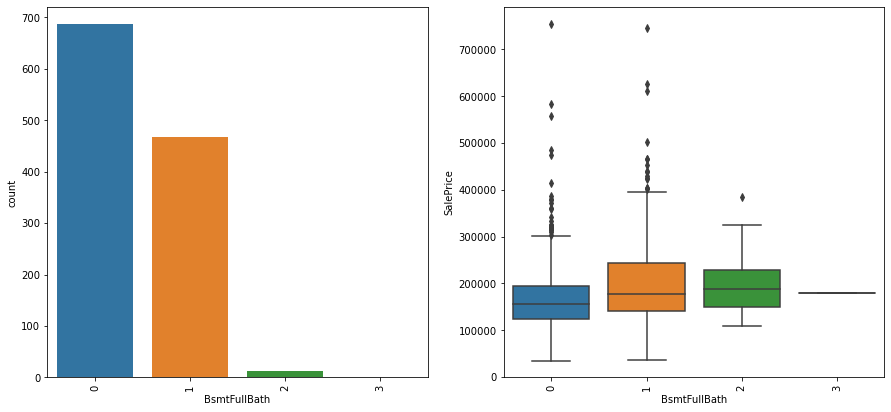

In [172]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtFullBath'])
plt.xlabel('BsmtFullBath')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtFullBath', y= 'SalePrice', data= train)
plt.xlabel('BsmtFullBath')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

49. BsmtHalfBath

In [173]:
train['BsmtHalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [174]:
train['BsmtHalfBath'].isnull().sum()

0

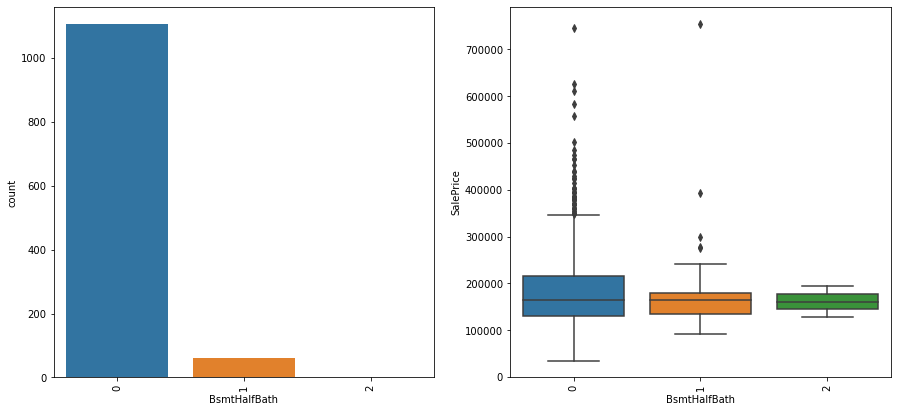

In [175]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BsmtHalfBath'])
plt.xlabel('BsmtHalfBath')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BsmtHalfBath', y= 'SalePrice', data= train)
plt.xlabel('BsmtHalfBath')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

50. FullBath

In [176]:
train['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

In [177]:
train['FullBath'].isnull().sum()

0

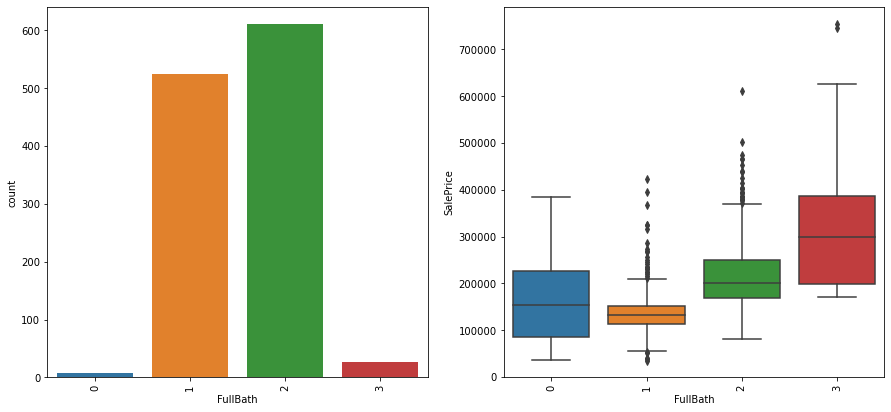

In [178]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['FullBath'])
plt.xlabel('FullBath')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'FullBath', y= 'SalePrice', data= train)
plt.xlabel('FullBath')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [179]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

51. HalfBath

In [180]:
train['HalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [181]:
train['HalfBath'].isnull().sum()

0

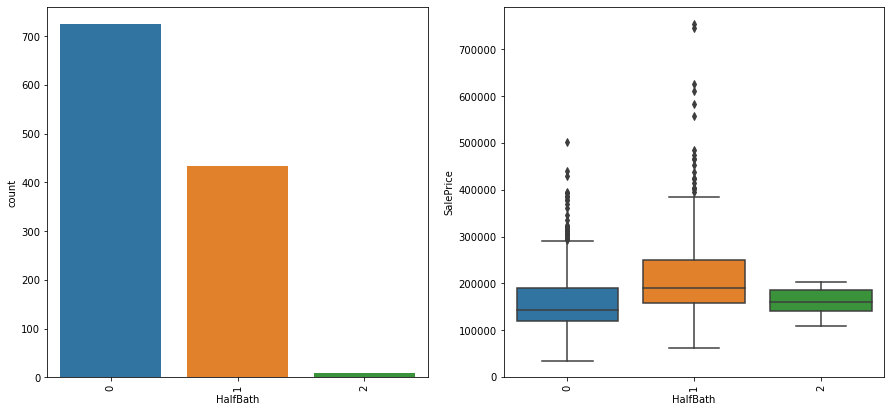

In [182]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['HalfBath'])
plt.xlabel('HalfBath')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'HalfBath', y= 'SalePrice', data= train)
plt.xlabel('HalfBath')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

52. BedroomAbvGR

In [183]:
train['BedroomAbvGr'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8], dtype=int64)

In [184]:
train['BedroomAbvGr'].isnull().sum()

0

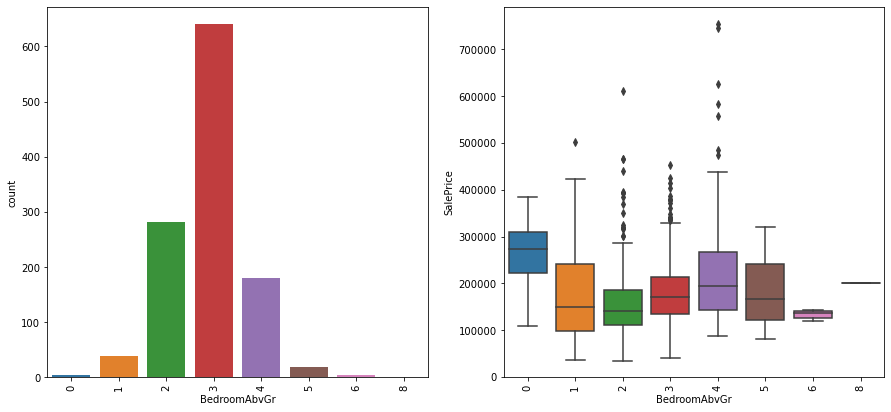

In [185]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['BedroomAbvGr'])
plt.xlabel('BedroomAbvGr')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'BedroomAbvGr', y= 'SalePrice', data= train)
plt.xlabel('BedroomAbvGr')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

53. KitchenAbvGr

In [186]:
train['KitchenAbvGr'].unique()

array([1, 2, 3, 0], dtype=int64)

In [187]:
train['KitchenAbvGr'].isnull().sum()

0

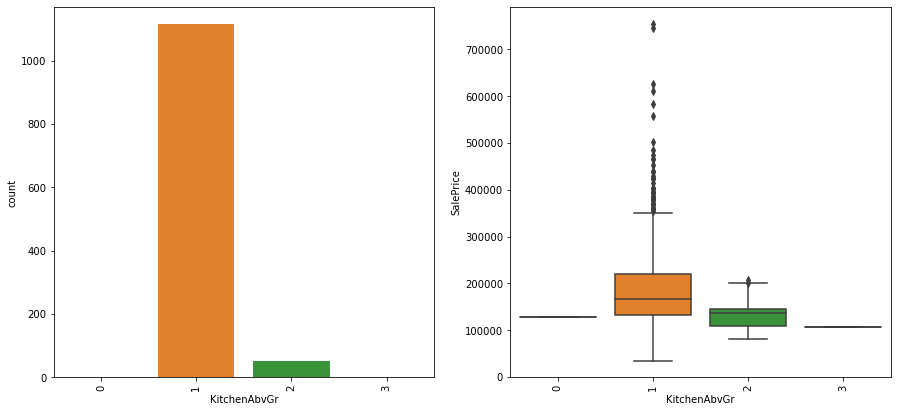

In [188]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['KitchenAbvGr'])
plt.xlabel('KitchenAbvGr')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'KitchenAbvGr', y= 'SalePrice', data= train)
plt.xlabel('KitchenAbvGr')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

54. KitchenQual

In [189]:
train['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [190]:
train['KitchenQual'].isnull().sum()

0

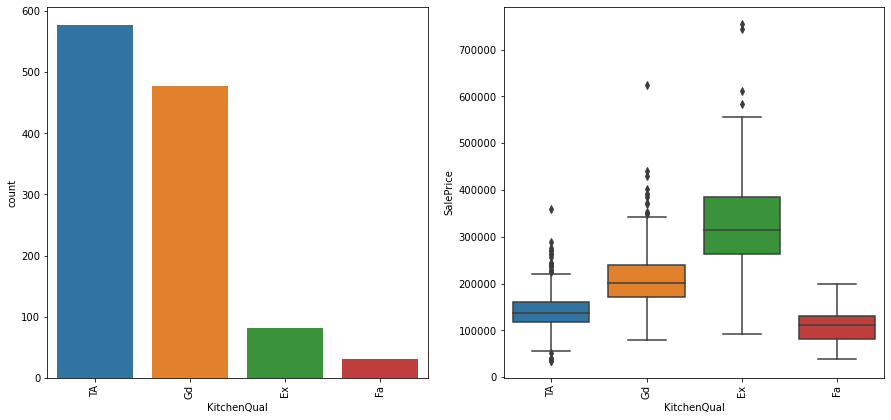

In [191]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['KitchenQual'])
plt.xlabel('KitchenQual')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'KitchenQual', y= 'SalePrice', data= train)
plt.xlabel('KitchenQual')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

55. TotRmsAbvGr

In [192]:
train['TotRmsAbvGrd'].unique()

array([ 5,  8,  7,  9,  6, 12,  4,  2,  3, 10, 11, 14], dtype=int64)

In [193]:
train['TotRmsAbvGrd'].isnull().sum()

0

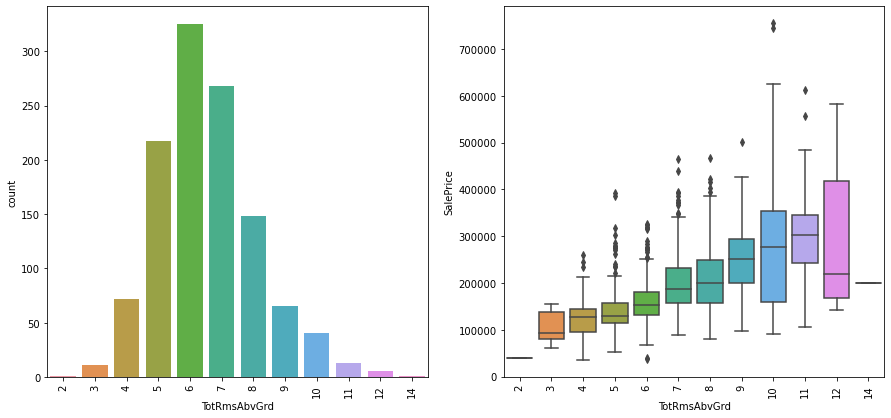

In [194]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['TotRmsAbvGrd'])
plt.xlabel('TotRmsAbvGrd')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'TotRmsAbvGrd', y= 'SalePrice', data= train)
plt.xlabel('TotRmsAbvGrd')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

56. Functional

In [195]:
train['Functional'].unique()

array(['Typ', 'Mod', 'Maj1', 'Min1', 'Min2', 'Sev', 'Maj2'], dtype=object)

In [196]:
train['Functional'].isnull().sum()

0

In [197]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Functional'])
plt.xlabel('Functional')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Functional', y= 'SalePrice', data= train)
plt.xlabel('Functional')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

57. FirePlaces

In [198]:
train['Fireplaces'].unique()

array([1, 0, 2, 3], dtype=int64)

In [199]:
train['Fireplaces'].isnull().sum()

0

In [200]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Fireplaces'])
plt.xlabel('Fireplaces')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Fireplaces', y= 'SalePrice', data= train)
plt.xlabel('Fireplaces')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

58. FireplaceQu

In [201]:
train['FireplaceQu'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [202]:
train['FireplaceQu'].isnull().sum()

551

In [203]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(method= 'bfill')
train['FireplaceQu'] = train['FireplaceQu'].fillna(method= 'ffill')

In [204]:
train['FireplaceQu'].isnull().sum()

0

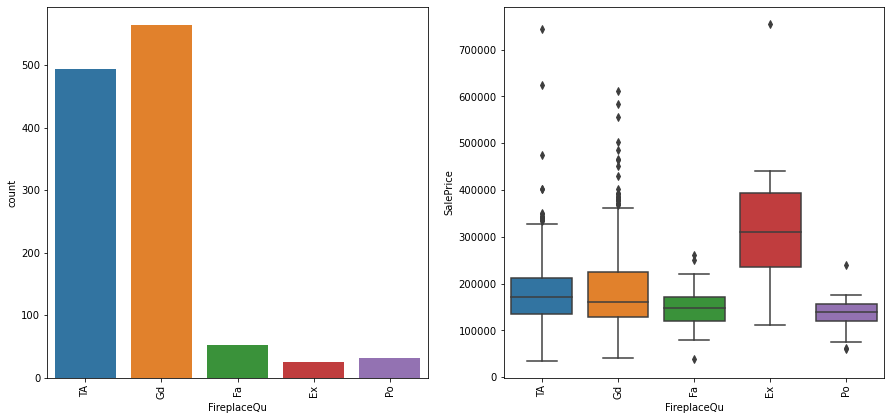

In [205]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['FireplaceQu'])
plt.xlabel('FireplaceQu')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'FireplaceQu', y= 'SalePrice', data= train)
plt.xlabel('FireplaceQu')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

59. GarageType

In [206]:
train['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [207]:
train['GarageType'].isnull().sum()

64

In [208]:
train['GarageType'] = train['GarageType'].fillna(method= 'bfill')
train['GarageType'] = train['GarageType'].fillna(method= 'ffill')

In [209]:
train['GarageType'].isnull().sum()

0

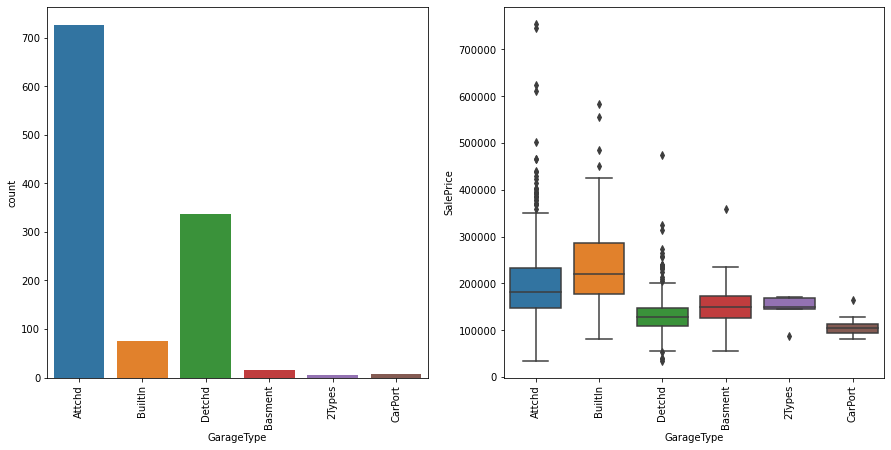

In [210]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['GarageType'])
plt.xlabel('GarageType')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'GarageType', y= 'SalePrice', data= train)
plt.xlabel('GarageType')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

60. GarageYrBlt

In [211]:
train['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

In [212]:
train['GarageYrBlt'].isnull().sum()

64

In [213]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(method= 'bfill')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(method= 'ffill')

In [214]:
train['GarageYrBlt'].isnull().sum()

0

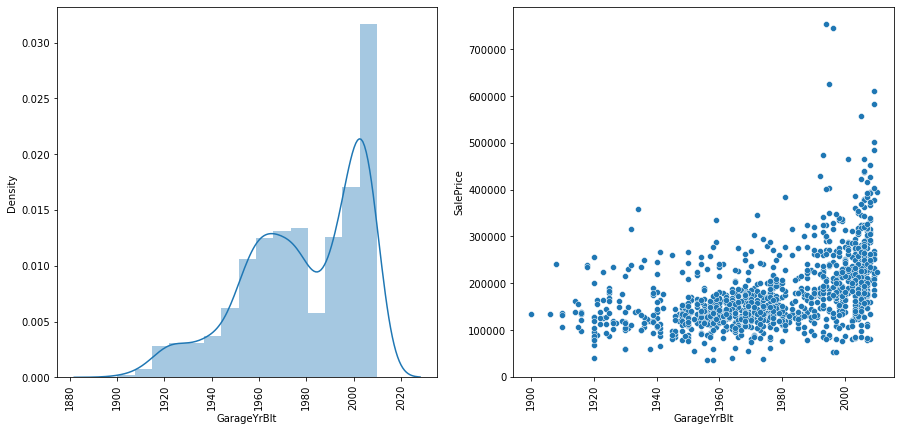

In [215]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['GarageYrBlt'])
plt.xlabel('GarageYrBlt')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'GarageYrBlt', y= 'SalePrice', data= train)
plt.xlabel('GarageYrBlt')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [216]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

61. GarageFinish

In [217]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [218]:
train['GarageFinish'].isnull().sum()

64

In [219]:
train['GarageFinish'] = train['GarageFinish'].fillna(method= 'bfill')
train['GarageFinish'] = train['GarageFinish'].fillna(method= 'ffill')

In [220]:
train['GarageFinish'].isnull().sum()

0

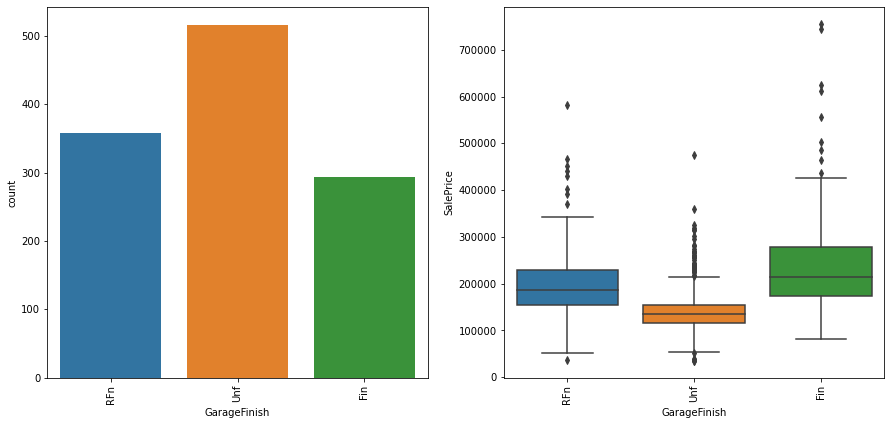

In [221]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['GarageFinish'])
plt.xlabel('GarageFinish')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'GarageFinish', y= 'SalePrice', data= train)
plt.xlabel('GarageFinish')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

62. GarageCars

In [222]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [223]:
train['GarageCars'].isnull().sum()

0

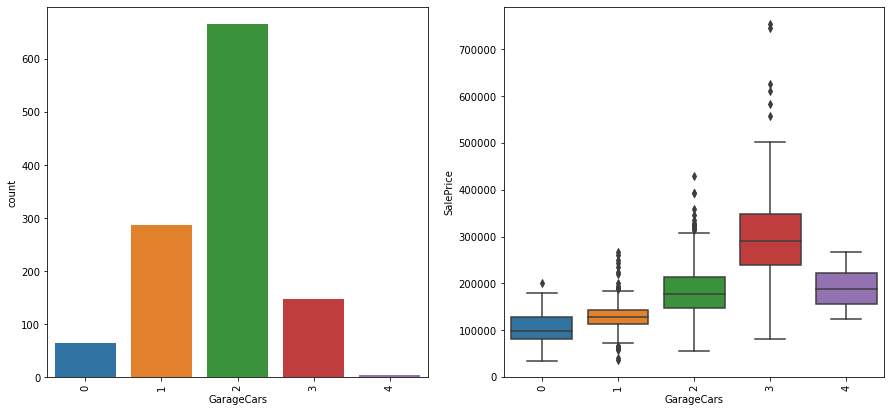

In [224]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['GarageCars'])
plt.xlabel('GarageCars')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'GarageCars', y= 'SalePrice', data= train)
plt.xlabel('GarageCars')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

63. GarageArea

In [225]:
train['GarageArea'].unique()

array([ 440,  621,  455,  546,  529,  660,  528,  484,  461,  336,  198,
        613,  573,  300,  180,  432,  632,  504,  564,  396,  240,  368,
        884,  450,  576,  834,  280,  600,  672,  479,  470,  308,  252,
        480,  380,  328,  264,  463,    0,  765,  520,  246,  756,  534,
        327,  702,  392,  288,  451,  575,  429,  738,  312,  474,  490,
        826,  360,  850,  514,  675,  418,  625,  390,  216,  686,  905,
        352,  682,  530,  630,  750,  562,  499,  608,  840,  836,  486,
        286,  627,  495,  476,  739,  442,  409,  894,  482,  570,  420,
        615,  315,  400,  824,  800,  736,  270,  434,  294,  779,  676,
        813,  511,  642,  588,  460,  572,  539,  462,  532,  502,  505,
        287,  812,  667,  456,  544,  384,  483,  550,  540,  377,  810,
        870,  648,  492,  506,  200,  508,  497,  283,  586,  574,  358,
        466,  865,  473,  275,  912,  569,  820,  690,  720,  299,  513,
        478,  880,  342,  711,  650,  527,  542,  4

In [226]:
train['GarageCars'].isnull().sum()

0

In [227]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['GarageArea'])
plt.xlabel('GarageArea')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'GarageArea', y= 'SalePrice', data= train)
plt.xlabel('GarageArea')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

64. GarageQual

In [228]:
train['GarageQual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [229]:
train['GarageQual'].isnull().sum()

64

In [230]:
train['GarageQual'] = train['GarageQual'].fillna(method= 'bfill')
train['GarageQual'] = train['GarageQual'].fillna(method= 'ffill')

In [231]:
train['GarageQual'].isnull().sum()

0

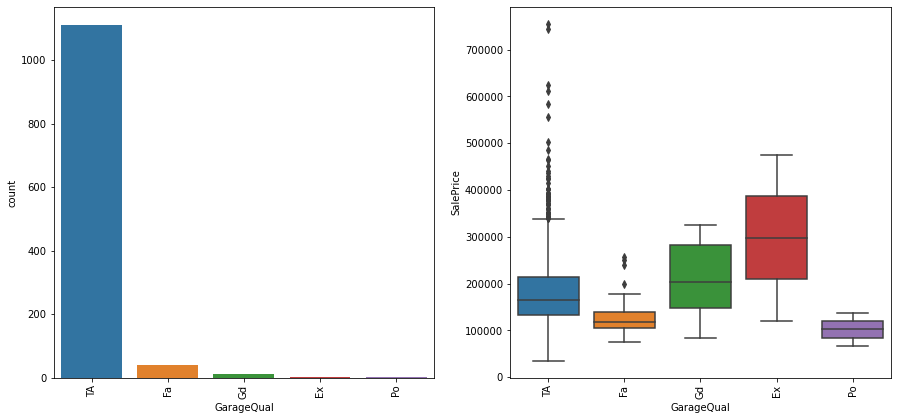

In [232]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['GarageQual'])
plt.xlabel('GarageQual')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'GarageQual', y= 'SalePrice', data= train)
plt.xlabel('GarageQual')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

65. GarageCond

In [233]:
train['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [234]:
train['GarageCond'].isnull().sum()

64

In [235]:
train['GarageCond'] = train['GarageCond'].fillna(method= 'bfill')
train['GarageCond'] = train['GarageCond'].fillna(method= 'ffill')

In [236]:
train['GarageCond'].isnull().sum()

0

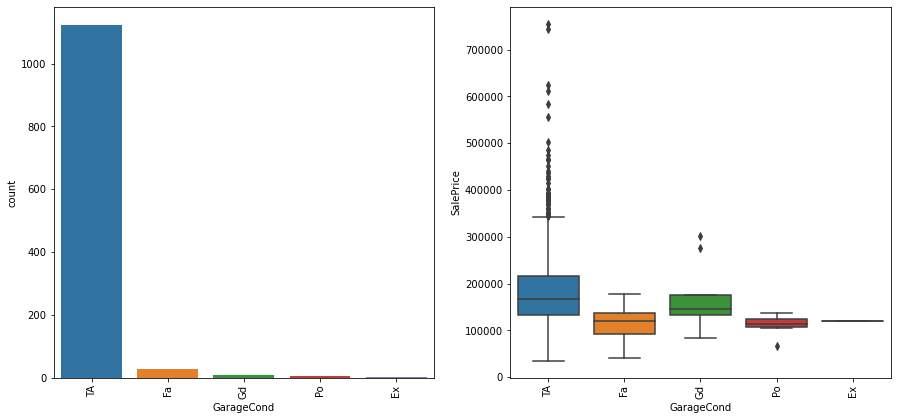

In [237]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['GarageCond'])
plt.xlabel('GarageCond')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'GarageCond', y= 'SalePrice', data= train)
plt.xlabel('GarageCond')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

66. PavedDrive

In [238]:
train['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [239]:
train['PavedDrive'].isnull().sum()

0

In [240]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['PavedDrive'])
plt.xlabel('PavedDrive')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'PavedDrive', y= 'SalePrice', data= train)
plt.xlabel('PavedDrive')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

67. WoodDeckSF

In [241]:
train['WoodDeckSF'].unique()

array([  0,  81, 180, 240, 100, 158, 192,  74, 121,  96, 132, 370,  58,
       366, 166, 113, 196, 155, 237, 120, 210, 261, 168, 270, 171, 301,
       288, 175, 252, 184,  33, 138,  53, 208, 216, 402, 351,  70, 278,
       305, 156, 380, 224, 315, 857, 128, 371, 140, 144, 253,  66, 114,
       250, 574, 185, 298, 187, 364, 668, 143, 222, 149, 356,  64,  68,
       272,  85, 355, 302, 147, 161, 325, 182,  48, 198, 268,  40, 203,
       238, 228, 116, 112, 164, 229, 517, 232, 309, 276, 367, 186, 160,
       392, 421, 255, 214,  36, 264, 736, 586, 212, 123, 304, 509, 169,
       173, 105,  95, 194, 142, 353, 256, 177,  38, 125,  92, 404,  60,
       500, 324, 344, 165, 320, 382, 245,  72,  88, 172, 328,  52, 241,
       431, 176, 197, 234, 260, 146,  55,  98, 292, 576, 322, 148, 486,
       314, 220, 342, 219, 154, 236, 183, 349, 199,  80,  78, 110, 409,
       335, 104, 257, 263,  49, 418, 280,  24, 269, 188, 108, 242, 201,
        57,  12,  26, 150, 179, 307, 200,  84, 170, 476, 352, 30

In [242]:
train['WoodDeckSF'].isnull().sum()

0

In [243]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['WoodDeckSF'])
plt.xlabel('WoodDeckSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'WoodDeckSF', y= 'SalePrice', data= train)
plt.xlabel('WoodDeckSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

68. OpenPorchSF

In [244]:
train['OpenPorchSF'].unique()

array([205, 207, 130, 122,   0,  17,  39, 150,  30,  96, 319,  64, 120,
        82,  24, 144,  29,  62, 166,  40,  63,  36,  78, 547, 159,  28,
       136,  84,  45, 129,  44, 229,  25,  33,  38, 128, 240, 189,  54,
        88,  80,  48,  42, 260, 102,  20,  73,  66,  22,  50, 124,  74,
        72,  53,  47, 104, 116, 172, 142,  35, 140,  56, 250,  92,  52,
        32,  21, 162,  58, 146,  12, 192, 182,  27,  60,  76, 241,  59,
        83, 112, 213,  67, 117, 114,  70, 175, 105, 154, 156,  57,  75,
       108, 158,  68, 236, 106,  23, 110, 135, 160, 138,  16,  46,  18,
       137,  65, 176, 406,   4, 211, 134, 235,  55, 100, 187, 113, 274,
        98, 204,  51, 228, 191, 170,  61,   8, 180, 312, 243, 151,  91,
       148, 121, 123,  81, 267, 132,  26, 288,  49, 292, 238, 111, 265,
       169, 103,  11, 291, 341, 502, 188,  90, 184,  43,  87, 133, 364,
       195, 131, 199,  34, 155,  69, 126, 234,  94, 168, 152, 523, 282,
       198,  77,  10, 262, 244,  93,  15], dtype=int64)

In [245]:
train['OpenPorchSF'].isnull().sum()

0

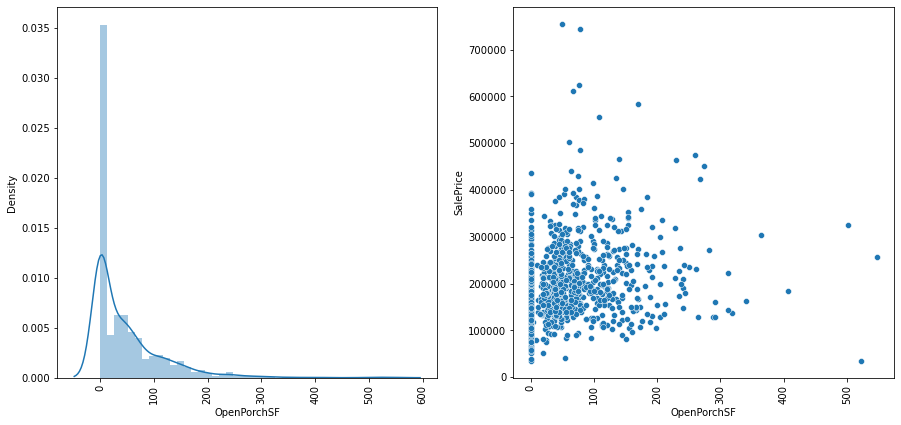

In [246]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['OpenPorchSF'])
plt.xlabel('OpenPorchSF')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'OpenPorchSF', y= 'SalePrice', data= train)
plt.xlabel('OpenPorchSF')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

69. EnclosedPorch

In [247]:
train['EnclosedPorch'].unique()

array([  0, 184, 102, 112,  96, 192, 116, 126, 145,  39, 156, 200, 120,
       286, 244,  68,  80, 216, 137, 234, 272,  44, 105,  24,  70, 114,
        98, 280, 100,  42, 148, 202, 294, 108, 130, 176, 154, 259,  67,
        84, 252, 208, 293, 291, 228, 129, 138, 158, 144, 185, 136, 242,
        40, 224, 264, 128, 177,  56,  34, 189, 268,  99, 150, 205, 301,
       275, 196, 164, 168, 180, 194, 230,  81, 212, 239,  64, 134, 162,
       115, 218,  36, 254,  60,  77, 248, 236, 240, 210,  52, 169, 221,
       220, 318,  30, 160, 123,  90, 170,  50, 386, 190, 552,  91, 174,
        54, 172], dtype=int64)

In [248]:
train['EnclosedPorch'].isnull().sum()

0

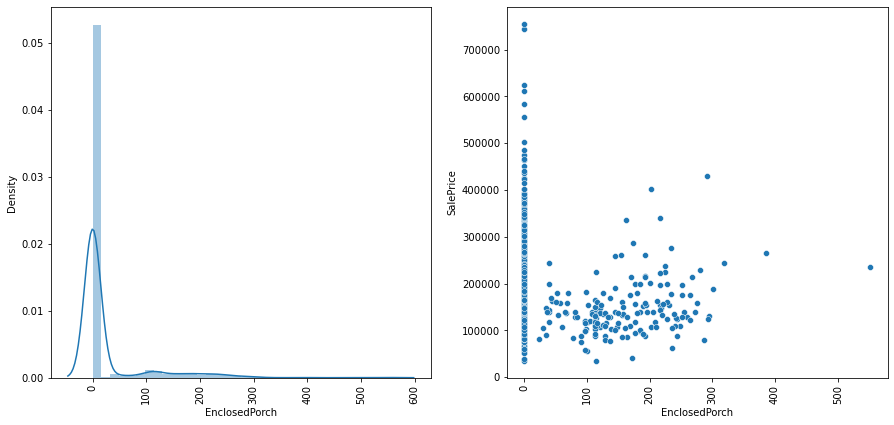

In [249]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['EnclosedPorch'])
plt.xlabel('EnclosedPorch')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'EnclosedPorch', y= 'SalePrice', data= train)
plt.xlabel('EnclosedPorch')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

70. 3SsnPorch

In [250]:
train['3SsnPorch'].unique()

array([  0, 245, 196, 140, 180,  96, 162, 168, 144, 290, 238, 216, 182,
       130, 304,  23, 153, 508], dtype=int64)

In [251]:
train['3SsnPorch'].isnull().sum()

0

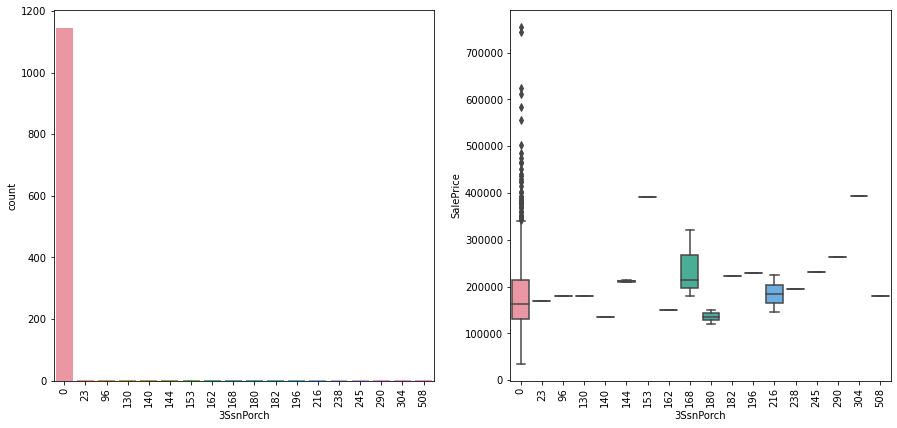

In [252]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['3SsnPorch'])
plt.xlabel('3SsnPorch')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= '3SsnPorch', y= 'SalePrice', data= train)
plt.xlabel('3SsnPorch')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [253]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

71. ScreenPorch

In [254]:
train['ScreenPorch'].unique()

array([  0, 224,  95, 265,  53, 192, 480, 128, 189, 140, 160, 410, 204,
       155, 216, 182, 126, 116, 168, 178,  90, 185, 147, 184, 153, 266,
       222, 271, 273,  99, 176, 288,  60, 122, 180,  80, 225, 120, 144,
        63, 156, 165, 440, 175, 161, 145, 143, 252, 190, 142,  40, 100,
       200, 260, 259, 154, 322, 291, 287, 197, 163, 385, 170, 198, 130],
      dtype=int64)

In [255]:
train['ScreenPorch'].isnull().sum()

0

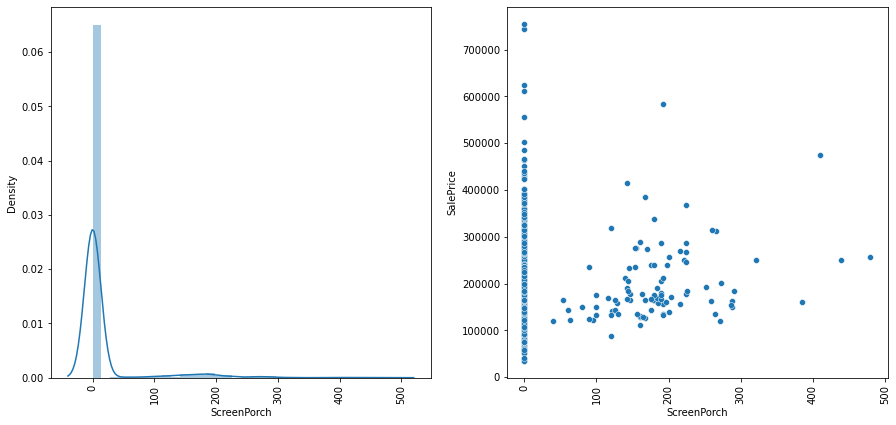

In [256]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.distplot(train['ScreenPorch'])
plt.xlabel('ScreenPorch')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'ScreenPorch', y= 'SalePrice', data= train)
plt.xlabel('ScreenPorch')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

72. PoolArea

In [257]:
train['PoolArea'].unique()

array([  0, 555, 576, 738, 519, 480, 648, 512], dtype=int64)

In [258]:
train['PoolArea'].isnull().sum()

0

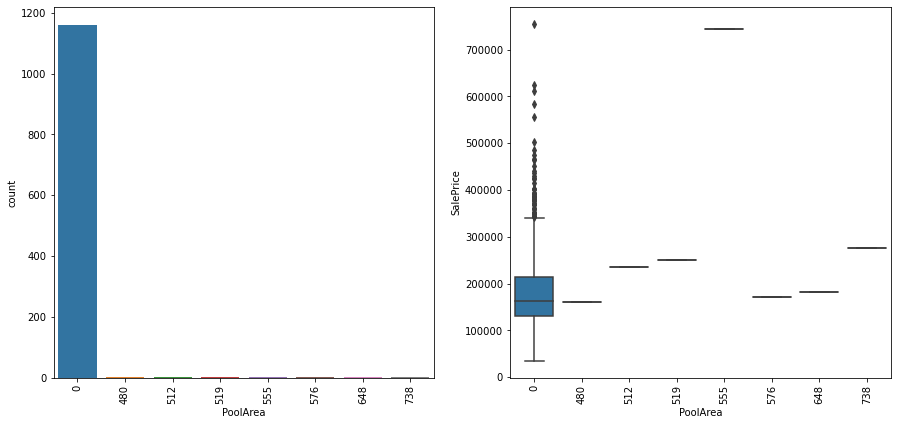

In [259]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['PoolArea'])
plt.xlabel('PoolArea')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'PoolArea', y= 'SalePrice', data= train)
plt.xlabel('PoolArea')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

73. PoolQC

In [260]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

In [261]:
train['PoolQC'].isnull().sum()

1161

In [262]:
train['PoolQC'] = train['PoolQC'].fillna(method= 'bfill')
train['PoolQC'] = train['PoolQC'].fillna(method= 'ffill')

In [263]:
train['PoolQC'].isnull().sum()

0

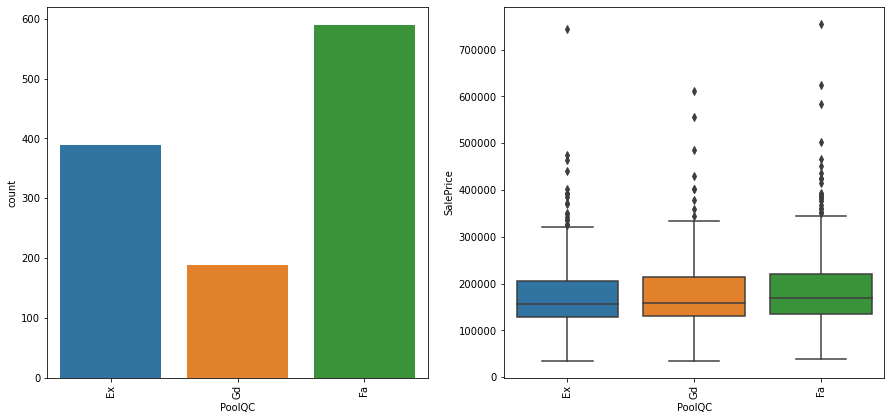

In [264]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['PoolQC'])
plt.xlabel('PoolQC')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'PoolQC', y= 'SalePrice', data= train)
plt.xlabel('PoolQC')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

74. Fence

In [265]:
train['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [266]:
train['Fence'].isnull().sum()

931

In [267]:
train['Fence'] = train['Fence'].fillna(method= 'bfill')
train['Fence'] = train['Fence'].fillna(method= 'ffill')

In [268]:
train['Fence'].isnull().sum()

0

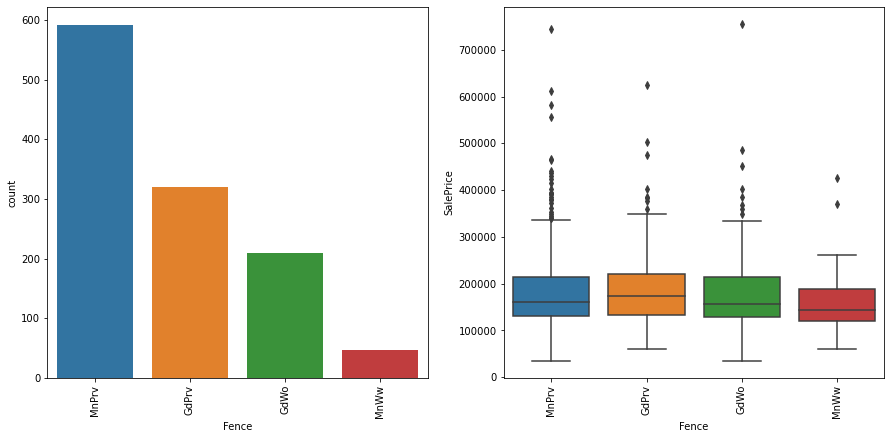

In [269]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['Fence'])
plt.xlabel('Fence')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'Fence', y= 'SalePrice', data= train)
plt.xlabel('Fence')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

75. MiscFeature

In [270]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [271]:
train['MiscFeature'].isnull().sum()

1124

In [272]:
train['MiscFeature'] = train['MiscFeature'].fillna(method= 'bfill')
train['MiscFeature'] = train['MiscFeature'].fillna(method= 'ffill')

In [273]:
train['MiscFeature'].isnull().sum()

0

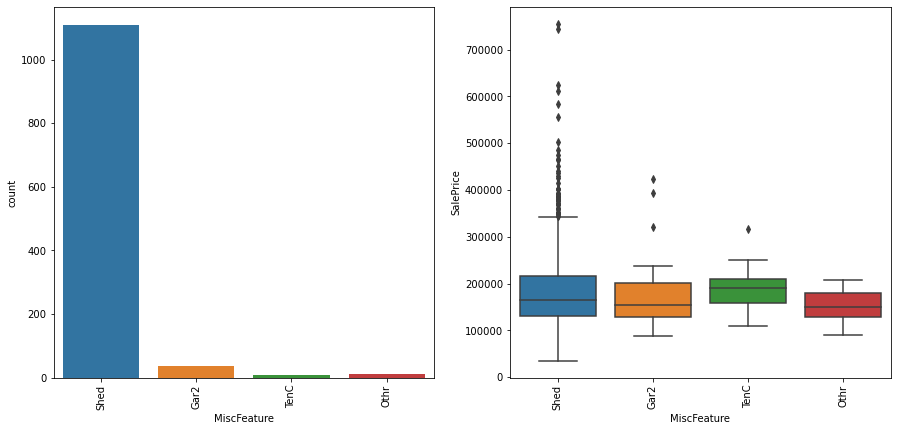

In [274]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MiscFeature'])
plt.xlabel('MiscFeature')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MiscFeature', y= 'SalePrice', data= train)
plt.xlabel('MiscFeature')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

76. MiscVal

In [275]:
train['MiscVal'].unique()

array([    0,   400,  8300,   600,  1150,   500,  1200,   480,  1300,
        1400,  2000,   700,   620, 15500,   450,   800,    54,   350,
         560,  2500], dtype=int64)

In [276]:
train['MiscVal'].isnull().sum()

0

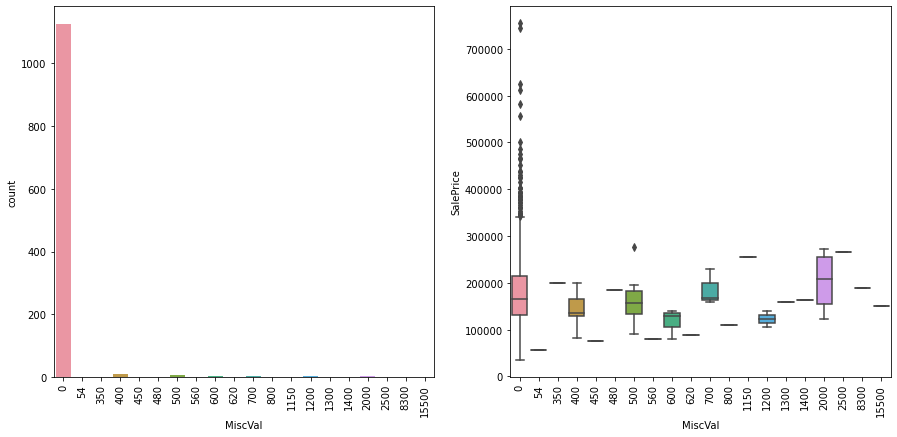

In [277]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MiscVal'])
plt.xlabel('MiscVal')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MiscVal', y= 'SalePrice', data= train)
plt.xlabel('MiscVal')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

77. MoSold

In [278]:
train['MoSold'].unique()

array([ 2, 10,  6,  1, 11,  5,  4,  7,  8,  3,  9, 12], dtype=int64)

In [279]:
train['MoSold'].isnull().sum()

0

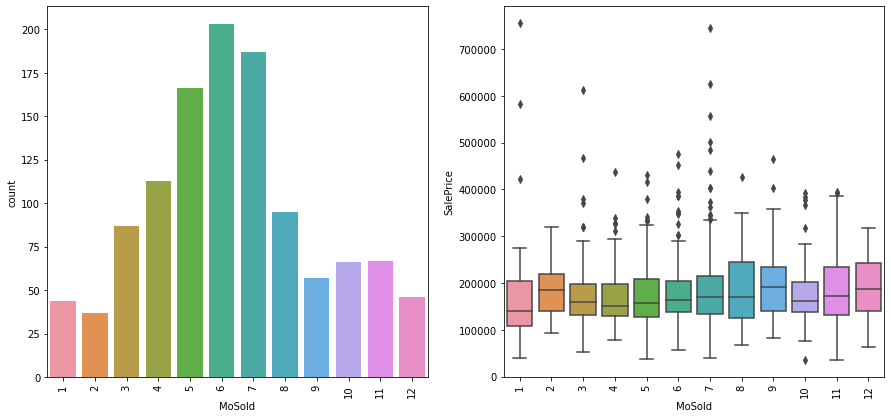

In [280]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['MoSold'])
plt.xlabel('MoSold')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'MoSold', y= 'SalePrice', data= train)
plt.xlabel('MoSold')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

78. YrSold

In [281]:
train['YrSold'].unique()

array([2007, 2010, 2009, 2006, 2008], dtype=int64)

In [282]:
train['YrSold'].isnull().sum()

0

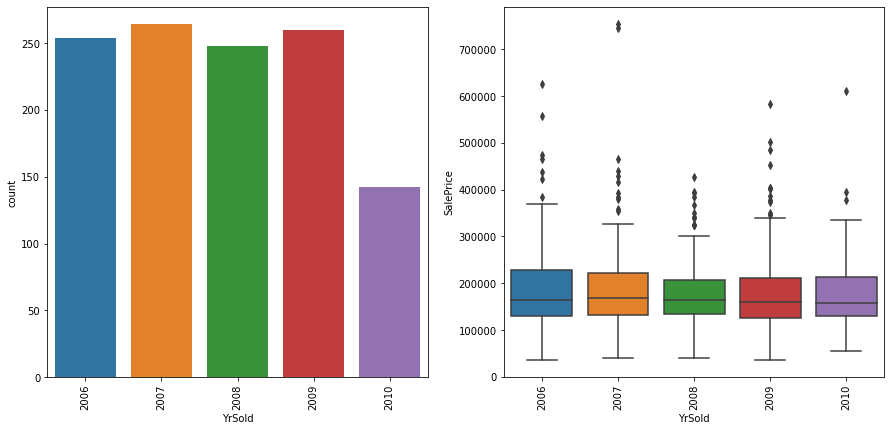

In [283]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['YrSold'])
plt.xlabel('YrSold')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'YrSold', y= 'SalePrice', data= train)
plt.xlabel('YrSold')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

79. SaleType

In [284]:
train['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLI', 'ConLw', 'Con', 'ConLD', 'Oth', 'CWD'],
      dtype=object)

In [285]:
train['SaleType'].isnull().sum()

0

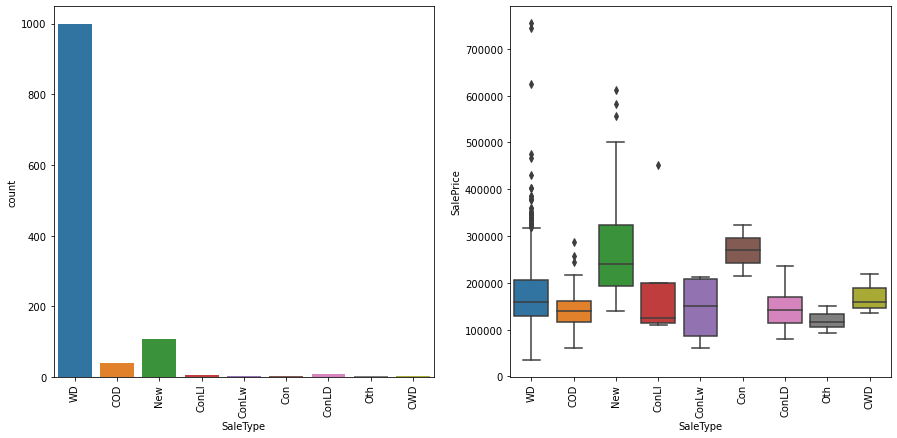

In [286]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['SaleType'])
plt.xlabel('SaleType')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'SaleType', y= 'SalePrice', data= train)
plt.xlabel('SaleType')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

80. SaleCondition

In [287]:
train['SaleCondition'].unique()

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [288]:
train['SaleCondition'].isnull().sum()

0

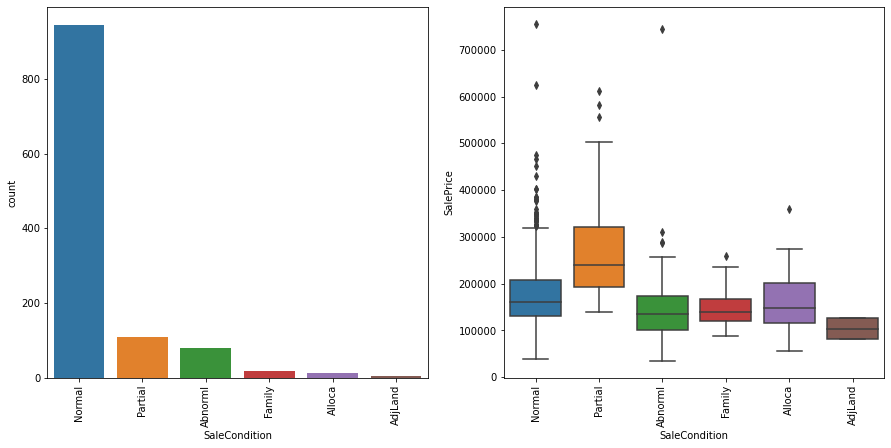

In [289]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(train['SaleCondition'])
plt.xlabel('SaleCondition')
plt.xticks(rotation= 90)
plt.subplot(222)
sns.boxplot(x= 'SaleCondition', y= 'SalePrice', data= train)
plt.xlabel('SaleCondition')
plt.xticks(rotation= 90)
plt.ylabel('SalePrice')
plt.show()

In [290]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [291]:
train['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [292]:
train['MSZoning'] = train['MSZoning'].replace(['RL', 'RM', 'FV', 'RH', 'C (all)'],
                                             np.arange(0,5))

In [293]:
train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [294]:
train['Street'] = train['Street'].replace(['Pave','Grvl'],[1,0])

In [295]:
train['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

In [296]:
train['Alley'] = train['Alley'].replace(['Pave','Grvl'],[1,0])

In [297]:
train['LotShape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [298]:
train['LotShape'] = train['LotShape'].replace(['IR1', 'Reg', 'IR2', 'IR3'],
                                             [1,0,2,3])

In [299]:
train['LandContour'].unique()

array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object)

In [300]:
train['LandContour'] = train['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'],
                                                   [0,1,2,3])

In [301]:
train['Utilities'].unique()

array(['AllPub'], dtype=object)

In [302]:
train['Utilities'] = train['Utilities'].replace(['AllPub'],[1])

In [303]:
train['LotConfig'].unique()

array(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'], dtype=object)

In [304]:
train['LotConfig'] = train['LotConfig'].replace(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'],
                                               [0,1,2,3,4])

In [305]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [306]:
train['LandSlope'] = train['LandSlope'].replace(['Gtl', 'Mod', 'Sev'],[0,1,2])

In [307]:
train['Neighborhood'].unique()

array(['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer',
       'Edwards', 'IDOTRR', 'CollgCr', 'Mitchel', 'Crawfor', 'BrDale',
       'StoneBr', 'BrkSide', 'NridgHt', 'OldTown', 'Somerst', 'Timber',
       'SWISU', 'SawyerW', 'ClearCr', 'Veenker', 'Blmngtn', 'MeadowV',
       'Blueste'], dtype=object)

In [308]:
train['Neighborhood'] = train['Neighborhood'].replace(['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer',
                                                       'Edwards', 'IDOTRR', 'CollgCr', 'Mitchel', 'Crawfor', 'BrDale',
                                                       'StoneBr', 'BrkSide', 'NridgHt', 'OldTown', 'Somerst', 'Timber',
                                                       'SWISU', 'SawyerW', 'ClearCr', 'Veenker', 'Blmngtn', 'MeadowV',
                                                       'Blueste'], np.arange(0,25))

In [309]:
train['Condition1'].unique()

array(['Norm', 'Feedr', 'RRAn', 'PosA', 'RRAe', 'Artery', 'PosN', 'RRNe',
       'RRNn'], dtype=object)

In [310]:
train['Condition1'] = train['Condition1'].replace(['Norm', 'Feedr', 'RRAn', 'PosA', 'RRAe', 'Artery', 'PosN', 'RRNe',
                                                   'RRNn'], np.arange(0,9))

In [311]:
train['Condition2'].unique()

array(['Norm', 'RRAe', 'Feedr', 'PosN', 'Artery', 'RRNn', 'PosA', 'RRAn'],
      dtype=object)

In [312]:
train['Condition2'] = train['Condition2'].replace(['Norm', 'RRAe', 'Feedr', 'PosN', 'Artery', 'RRNn', 'PosA', 'RRAn'],
                                                 np.arange(0,8))

In [313]:
train['BldgType'].unique()

array(['TwnhsE', '1Fam', 'Duplex', 'Twnhs', '2fmCon'], dtype=object)

In [314]:
train['BldgType'] = train['BldgType'].replace(['TwnhsE', '1Fam', 'Duplex', 'Twnhs', '2fmCon'],
                                             [0,1,2,3,4])

In [315]:
train['HouseStyle'].unique()

array(['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Fin',
       '2.5Unf'], dtype=object)

In [316]:
train['HouseStyle'] = train['HouseStyle'].replace(['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Fin',
                                                   '2.5Unf'], np.arange(0,8))

In [317]:
train['RoofStyle'].unique()

array(['Gable', 'Flat', 'Hip', 'Shed', 'Gambrel', 'Mansard'], dtype=object)

In [318]:
train['RoofStyle'] = train['RoofStyle'].replace(['Gable', 'Flat', 'Hip', 'Shed', 'Gambrel', 'Mansard'],
                                               [0,1,2,3,4,5])

In [319]:
train['RoofMatl'].unique()

array(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Roll', 'ClyTile',
       'Metal', 'Membran'], dtype=object)

In [320]:
train['RoofMatl'] = train['RoofMatl'].replace(['CompShg', 'Tar&Grv', 'WdShngl', 'WdShake', 'Roll', 'ClyTile',
                                               'Metal', 'Membran'],np.arange(0,8))

In [321]:
train['Exterior1st'].unique()

array(['Plywood', 'Wd Sdng', 'MetalSd', 'CemntBd', 'VinylSd', 'HdBoard',
       'Stucco', 'WdShing', 'BrkFace', 'Stone', 'AsbShng', 'AsphShn',
       'ImStucc', 'BrkComm'], dtype=object)

In [322]:
train['Exterior1st'] = train['Exterior1st'].replace(['Plywood', 'Wd Sdng', 'MetalSd', 'CemntBd', 'VinylSd', 'HdBoard',
                                                     'Stucco', 'WdShing', 'BrkFace', 'Stone', 'AsbShng', 'AsphShn',
                                                     'ImStucc', 'BrkComm'], np.arange(0,14))

In [323]:
train['Exterior2nd'].unique()

array(['Plywood', 'Wd Sdng', 'MetalSd', 'CmentBd', 'VinylSd', 'HdBoard',
       'Wd Shng', 'Stucco', 'ImStucc', 'Stone', 'BrkFace', 'AsbShng',
       'Brk Cmn', 'AsphShn', 'Other'], dtype=object)

In [324]:
train['Exterior2nd'] = train['Exterior2nd'].replace(['Plywood', 'Wd Sdng', 'MetalSd', 'CmentBd', 'VinylSd', 'HdBoard',
                                                     'Wd Shng', 'Stucco', 'ImStucc', 'Stone', 'BrkFace', 'AsbShng',
                                                     'Brk Cmn', 'AsphShn', 'Other'], np.arange(0,15))

In [325]:
train['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

In [326]:
train['MasVnrType'] = train['MasVnrType'].replace(['None', 'BrkFace', 'Stone', 'BrkCmn'],
                                                 [0,1,2,3])

In [327]:
train['ExterQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [328]:
train['ExterQual'] = train['ExterQual'].replace(['TA', 'Gd', 'Ex', 'Fa'],[0,1,2,3])

In [329]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [330]:
train['ExterCond'] = train['ExterCond'].replace(['TA', 'Gd', 'Fa', 'Po', 'Ex'],
                                                [0,1,2,3,4])

In [331]:
train['Foundation'].unique()

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [332]:
train['Foundation'] = train['Foundation'].replace(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'],
                                                 [0,1,2,3,4,5])

In [333]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [334]:
train['BsmtQual'] = train['BsmtQual'].replace(['Gd', 'TA', 'Ex', 'Fa'],[0,1,2,3])

In [335]:
train['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [336]:
train['BsmtCond'] = train['BsmtCond'].replace(['TA', 'Gd', 'Fa', 'Po'],[0,1,2,3])

In [337]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Av', 'Mn'], dtype=object)

In [338]:
train['BsmtExposure'] = train['BsmtExposure'].replace(['No', 'Gd', 'Av', 'Mn'],
                                                     [0,1,2,3])

In [339]:
train['BsmtFinType1'].unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ'], dtype=object)

In [340]:
train['BsmtFinType1'] = train['BsmtFinType1'].replace(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ'],
                                                     [0,1,2,3,4,5])

In [341]:
train['BsmtFinType2'].unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', 'ALQ', 'LwQ'], dtype=object)

In [342]:
train['BsmtFinType2'] = train['BsmtFinType2'].replace(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ'],
                                                     [0,1,2,3,4,5])

In [343]:
train['Heating'].unique()

array(['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav'], dtype=object)

In [344]:
train['Heating'] = train['Heating'].replace(['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav'],
                                           [0,1,2,3,4,5])

In [345]:
train['HeatingQC'].unique()

array(['TA', 'Ex', 'Gd', 'Fa', 'Po'], dtype=object)

In [346]:
train['HeatingQC'] = train['HeatingQC'].replace(['TA', 'Ex', 'Gd', 'Fa', 'Po'],
                                               [0,1,2,3,4])

In [347]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [348]:
train['CentralAir'] = train['CentralAir'].replace(['Y','N'],[1,0])

In [349]:
train['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], dtype=object)

In [350]:
train['Electrical'] = train['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
                                                 [0,1,2,3,4])

In [351]:
train['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [352]:
train['KitchenQual'] = train['KitchenQual'].replace(['TA', 'Gd', 'Ex', 'Fa'],
                                                   [0,1,2,3])

In [353]:
train['Functional'].unique()

array(['Typ', 'Mod', 'Maj1', 'Min1', 'Min2', 'Sev', 'Maj2'], dtype=object)

In [354]:
train['Functional'] = train['Functional'].replace(['Typ', 'Mod', 'Maj1', 'Min1', 'Min2', 'Sev', 'Maj2'],
                                                 [0,1,2,3,4,5,6])

In [355]:
train['FireplaceQu'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [356]:
train['FireplaceQu'] = train['FireplaceQu'].replace(['TA', 'Gd', 'Fa', 'Ex', 'Po'],
                                                   [0,1,2,3,4])

In [357]:
train['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', '2Types', 'CarPort'],
      dtype=object)

In [358]:
train['GarageType'] = train['GarageType'].replace(['Attchd', 'BuiltIn', 'Detchd', 'Basment', '2Types', 'CarPort'],
                                                 [0,1,2,3,4,5])

In [359]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [360]:
train['GarageFinish'] = train['GarageFinish'].replace(['RFn', 'Unf', 'Fin'],
                                                     [0,1,2])

In [361]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [362]:
train['GarageQual'] = train['GarageQual'].replace(['TA', 'Fa', 'Gd', 'Ex', 'Po'],
                                                 [0,1,2,3,4])

In [363]:
train['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [364]:
train['GarageCond'] = train['GarageCond'].replace(['TA', 'Fa', 'Gd', 'Po', 'Ex'],
                                                 [0,1,2,3,4])

In [365]:
train['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [366]:
train['PavedDrive'] = train['PavedDrive'].replace(['Y','N','P'],[1,0,2])

In [367]:
train['PoolQC'].unique()

array(['Ex', 'Gd', 'Fa'], dtype=object)

In [368]:
train['PoolQC'] = train['PoolQC'].replace(['Ex', 'Gd', 'Fa'],[0,1,2])

In [369]:
train['Fence'].unique()

array(['MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [370]:
train['Fence'] = train['Fence'].replace(['MnPrv', 'GdPrv', 'GdWo', 'MnWw'],
                                       [0,1,2,3])

In [371]:
train['MiscFeature'].unique()

array(['Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [372]:
train['MiscFeature'] = train['MiscFeature'].replace(['Shed', 'Gar2', 'TenC', 'Othr'],
                                                   [0,1,2,3])

In [373]:
train['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLI', 'ConLw', 'Con', 'ConLD', 'Oth', 'CWD'],
      dtype=object)

In [374]:
train['SaleType'] = train['SaleType'].replace(['WD', 'COD', 'New', 'ConLI', 'ConLw', 'Con', 'ConLD', 'Oth', 'CWD'],
                                             np.arange(0,9))

In [375]:
train['SaleCondition'].unique()

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [376]:
train['SaleCondition'] = train['SaleCondition'].replace(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
                                                       [0,1,2,3,4,5])

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   int32  
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   int64  
 6   Alley          1168 non-null   int64  
 7   LotShape       1168 non-null   int64  
 8   LandContour    1168 non-null   int64  
 9   Utilities      1168 non-null   int64  
 10  LotConfig      1168 non-null   int64  
 11  LandSlope      1168 non-null   int64  
 12  Neighborhood   1168 non-null   int32  
 13  Condition1     1168 non-null   int32  
 14  Condition2     1168 non-null   int32  
 15  BldgType       1168 non-null   int64  
 16  HouseStyle     1168 non-null   int32  
 17  OverallQual    1168 non-null   int64  
 18  OverallC

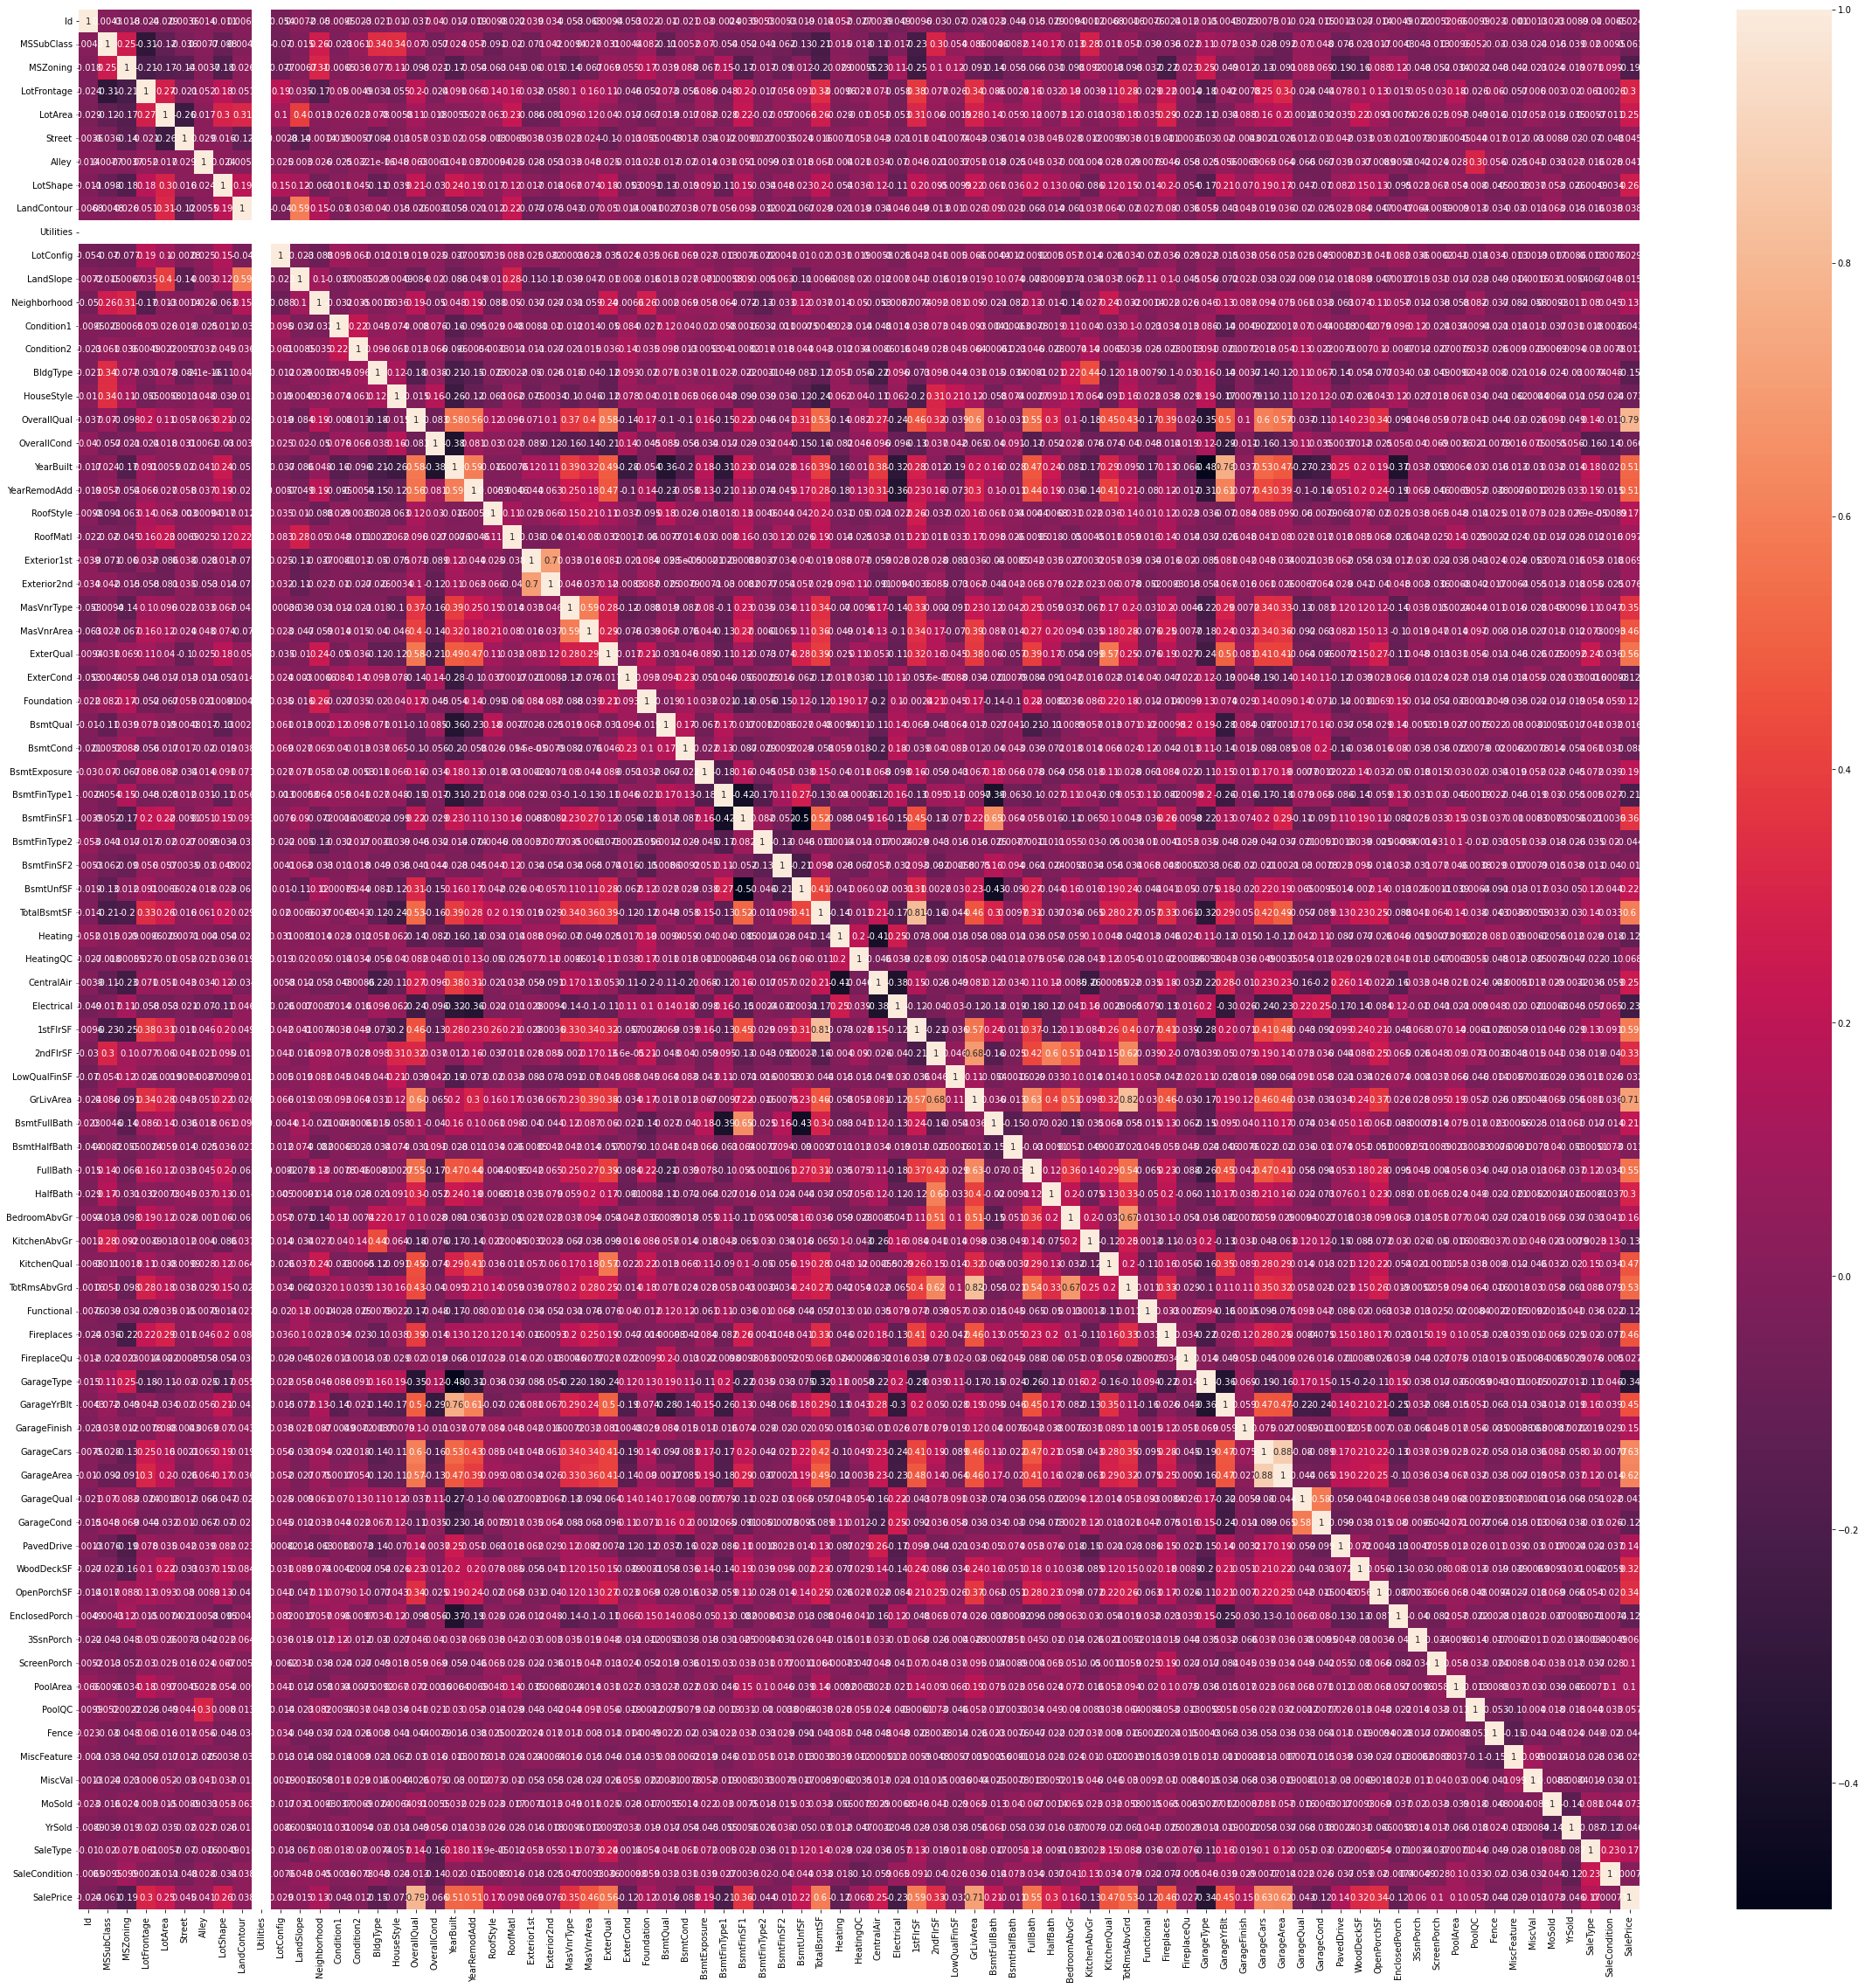

In [378]:
plt.figure(figsize= [40,40])
sns.heatmap(train.corr(), annot= True)
plt.show()

In [379]:
train.drop(['Utilities','Alley','SaleCondition','GarageQual'], axis= 1, inplace= True)

In [380]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [381]:
test.shape

(292, 80)

In [382]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [383]:
test['Id'].isnull().sum()

0

In [384]:
print(test['MSSubClass'].isnull().sum())
print(test['MSZoning'].isnull().sum())

0
0


In [385]:
print(test['LotFrontage'].isnull().sum())
print(test['LotArea'].isnull().sum())
print(test['LotShape'].isnull().sum())
print(test['LotConfig'].isnull().sum())

45
0
0
0


In [386]:
test['LotFrontage'] = test['LotFrontage'].fillna(method= 'bfill')
test['LotFrontage'] = test['LotFrontage'].fillna(method= 'ffill')

In [387]:
print(test['Street'].isnull().sum())
print(test['Alley'].isnull().sum())
print(test['LandContour'].isnull().sum())
print(test['Utilities'].isnull().sum())

0
278
0
0


In [388]:
test['Alley'] = test['Alley'].fillna(method= 'bfill')
test['Alley'] = test['Alley'].fillna(method= 'ffill')

In [389]:
print(test['LandSlope'].isnull().sum())
print(test['Neighborhood'].isnull().sum())
print(test['Condition1'].isnull().sum())
print(test['Condition2'].isnull().sum())

0
0
0
0


In [390]:
print(test['BldgType'].isnull().sum())
print(test['HouseStyle'].isnull().sum())

0
0


In [391]:
print(test['OverallQual'].isnull().sum())
print(test['OverallCond'].isnull().sum())
print(test['YearBuilt'].isnull().sum())
print(test['YearRemodAdd'].isnull().sum())

0
0
0
0


In [392]:
print(test['RoofMatl'].isnull().sum())
print(test['RoofStyle'].isnull().sum())
print(test['Exterior1st'].isnull().sum())
print(test['Exterior2nd'].isnull().sum())

0
0
0
0


In [393]:
print(test['MasVnrType'].isnull().sum())
print(test['MasVnrArea'].isnull().sum())
print(test['ExterQual'].isnull().sum())
print(test['ExterCond'].isnull().sum())

1
1
0
0


In [394]:
test['MasVnrArea'] = test['MasVnrArea'].fillna(method= 'bfill')
test['MasVnrArea'] = test['MasVnrArea'].fillna(method= 'ffill')
test['MasVnrType'] = test['MasVnrType'].fillna(method= 'bfill')
test['MasVnrType'] = test['MasVnrType'].fillna(method= 'ffill')

In [395]:
print(test['Foundation'].isnull().sum())
print(test['BsmtCond'].isnull().sum())
print(test['BsmtExposure'].isnull().sum())
print(test['BsmtFinSF1'].isnull().sum())
print(test['BsmtFinSF2'].isnull().sum())
print(test['BsmtFinType1'].isnull().sum())
print(test['BsmtFinType2'].isnull().sum())
print(test['BsmtFullBath'].isnull().sum())
print(test['BsmtHalfBath'].isnull().sum())
print(test['BsmtQual'].isnull().sum())
print(test['BsmtUnfSF'].isnull().sum())

0
7
7
0
0
7
7
0
0
7
0


In [396]:
test['BsmtCond'] = test['BsmtCond'].fillna(method= 'bfill')
test['BsmtCond'] = test['BsmtCond'].fillna(method= 'ffill')
test['BsmtExposure'] = test['BsmtExposure'].fillna(method= 'bfill')
test['BsmtExposure'] = test['BsmtExposure'].fillna(method= 'ffill')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(method= 'bfill')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(method= 'ffill')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(method= 'bfill')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(method= 'ffill')
test['BsmtQual'] = test['BsmtQual'].fillna(method= 'bfill')
test['BsmtCond'] = test['BsmtQual'].fillna(method= 'ffill')

In [397]:
print(test['TotalBsmtSF'].isnull().sum())
print(test['Heating'].isnull().sum())
print(test['HeatingQC'].isnull().sum())
print(test['CentralAir'].isnull().sum())
print(test['Electrical'].isnull().sum())

0
0
0
0
1


In [398]:
test['Electrical'] = test['Electrical'].fillna(method= 'bfill')
test['Electrical'] = test['Electrical'].fillna(method= 'ffill')

In [399]:
print(test['1stFlrSF'].isnull().sum())
print(test['2ndFlrSF'].isnull().sum())
print(test['LowQualFinSF'].isnull().sum())
print(test['GrLivArea'].isnull().sum())

0
0
0
0


In [400]:
print(test['FullBath'].isnull().sum())
print(test['HalfBath'].isnull().sum())
print(test['BedroomAbvGr'].isnull().sum())
print(test['KitchenAbvGr'].isnull().sum())

0
0
0
0


In [401]:
print(test['KitchenQual'].isnull().sum())
print(test['TotRmsAbvGrd'].isnull().sum())
print(test['Functional'].isnull().sum())
print(test['Fireplaces'].isnull().sum())

0
0
0
0


In [402]:
print(test['FireplaceQu'].isnull().sum())
print(test['GarageArea'].isnull().sum())
print(test['GarageCars'].isnull().sum())
print(test['GarageCond'].isnull().sum())
print(test['GarageFinish'].isnull().sum())
print(test['GarageQual'].isnull().sum())
print(test['GarageType'].isnull().sum())
print(test['GarageYrBlt'].isnull().sum())

139
0
0
17
17
17
17
17


In [403]:
test['FireplaceQu'] = test['FireplaceQu'].fillna(method= 'bfill')
test['FireplaceQu'] = test['FireplaceQu'].fillna(method= 'ffill')
test['GarageCond'] = test['GarageCond'].fillna(method= 'bfill')
test['GarageCond'] = test['GarageCond'].fillna(method= 'ffill')
test['GarageFinish'] = test['GarageFinish'].fillna(method= 'bfill')
test['GarageFinish'] = test['GarageFinish'].fillna(method= 'ffill')
test['GarageQual'] = test['GarageQual'].fillna(method= 'bfill')
test['GarageQual'] = test['GarageQual'].fillna(method= 'ffill')
test['GarageType'] = test['GarageType'].fillna(method= 'bfill')
test['GarageType'] = test['GarageType'].fillna(method= 'ffill')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(method= 'bfill')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(method= 'ffill')

In [404]:
print(test['PavedDrive'].isnull().sum())
print(test['OpenPorchSF'].isnull().sum())
print(test['WoodDeckSF'].isnull().sum())
print(test['EnclosedPorch'].isnull().sum())

0
0
0
0


In [405]:
print(test['3SsnPorch'].isnull().sum())
print(test['ScreenPorch'].isnull().sum())
print(test['PoolArea'].isnull().sum())
print(test['PoolQC'].isnull().sum())

0
0
0
292


In [406]:
test['PoolQC'].unique()

array([nan])

In [407]:
test['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [408]:
train['PoolQC'].unique()

array([0, 1, 2], dtype=int64)

In [409]:
test.loc[((test['PavedDrive']== 'Y') & (test['PoolQC'].isnull())), 'PoolQC']= 'Ex'
test.loc[((test['PavedDrive']== 'N') & (test['PoolQC'].isnull())), 'PoolQC']= 'Gd'
test.loc[((test['PavedDrive']== 'P') & (test['PoolQC'].isnull())), 'PoolQC']= 'Fa'

In [410]:
test['PoolQC'].isnull().sum()

0

In [411]:
print(test['Fence'].isnull().sum())
print(test['MiscFeature'].isnull().sum())
print(test['MiscVal'].isnull().sum())
print(test['MoSold'].isnull().sum())

248
282
0
0


In [412]:
test['BsmtExposure'].unique()

array(['Gd', 'Av', 'No', 'Mn'], dtype=object)

In [413]:
test['Fence'] = test['Fence'].fillna(method= 'bfill')
test['Fence'] = test['Fence'].fillna(method= 'ffill')
test.loc[((test['BsmtExposure']== 'Gd') & (test['MiscFeature'].isnull())), 'MiscFeature']= 'Shed'
test.loc[((test['BsmtExposure']== 'Av') & (test['MiscFeature'].isnull())), 'MiscFeature']= 'Gar2'
test.loc[((test['BsmtExposure']== 'No') & (test['MiscFeature'].isnull())), 'MiscFeature']= 'TenC'
test.loc[((test['BsmtExposure']== 'Mn') & (test['MiscFeature'].isnull())), 'MiscFeature']= 'Othr'

In [414]:
print(test['YrSold'].isnull().sum())
print(test['SaleCondition'].isnull().sum())
print(test['SaleType'].isnull().sum())

0
0
0


In [415]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [416]:
test['MSZoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [417]:
test['MSZoning'] = test['MSZoning'].replace(['RL', 'RM', 'FV', 'RH', 'C (all)'],
                                             np.arange(0,5))

In [418]:
test['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [419]:
test['Street'] = test['Street'].replace(['Pave','Grvl'],[1,0])

In [420]:
test['Alley'].unique()

array(['Grvl', 'Pave'], dtype=object)

In [421]:
test['Alley'] = test['Alley'].replace(['Pave','Grvl'],[1,0])

In [422]:
test['LotShape'].unique()

array(['IR1', 'Reg', 'IR3', 'IR2'], dtype=object)

In [423]:
test['LotShape'] = test['LotShape'].replace(['IR1', 'Reg', 'IR2', 'IR3'],
                                             [1,0,2,3])

In [424]:
test['LandContour'].unique()

array(['HLS', 'Lvl', 'Bnk', 'Low'], dtype=object)

In [425]:
test['LandContour'] = test['LandContour'].replace(['Lvl', 'Bnk', 'HLS', 'Low'],
                                                   [0,1,2,3])

In [426]:
test['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [427]:
test['Utilities'] = test['Utilities'].replace(['AllPub','NoSeWa'],[1,0])

In [428]:
test['LotConfig'].unique()

array(['Corner', 'CulDSac', 'Inside', 'FR2', 'FR3'], dtype=object)

In [429]:
test['LotConfig'] = test['LotConfig'].replace(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'],
                                               [0,1,2,3,4])

In [430]:
test['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [431]:
test['LandSlope'] = test['LandSlope'].replace(['Gtl', 'Mod', 'Sev'],[0,1,2])

In [432]:
test['Neighborhood'].unique()

array(['StoneBr', 'CollgCr', 'Crawfor', 'Somerst', 'MeadowV', 'Edwards',
       'NridgHt', 'SawyerW', 'Mitchel', 'BrkSide', 'NAmes', 'Timber',
       'OldTown', 'Sawyer', 'IDOTRR', 'SWISU', 'Gilbert', 'NWAmes',
       'BrDale', 'NPkVill', 'NoRidge', 'Blmngtn', 'Veenker', 'ClearCr'],
      dtype=object)

In [433]:
test['Neighborhood'] = test['Neighborhood'].replace(['StoneBr', 'CollgCr', 'Crawfor', 'Somerst', 'MeadowV', 'Edwards',
                                                       'NridgHt', 'SawyerW', 'Mitchel', 'BrkSide', 'NAmes', 'Timber',
                                                       'OldTown', 'Sawyer', 'IDOTRR', 'SWISU', 'Gilbert', 'NWAmes',
                                                       'BrDale', 'NPkVill', 'NoRidge', 'Blmngtn', 'Veenker', 'ClearCr'], np.arange(0,24))

In [434]:
test['Condition1'].unique()

array(['Norm', 'Feedr', 'Artery', 'RRAe', 'RRNn', 'PosN', 'RRAn', 'PosA'],
      dtype=object)

In [435]:
test['Condition1'] = test['Condition1'].replace(['Norm', 'Feedr', 'Artery', 'RRAe', 'RRNn', 'PosN', 'RRAn', 'PosA'],
                                                np.arange(0,8))

In [436]:
test['Condition2'].unique()

array(['Norm', 'RRNn'], dtype=object)

In [437]:
test['Condition2'] = test['Condition2'].replace(['Norm', 'RRNn'],[1,0])

In [438]:
test['BldgType'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [439]:
test['BldgType'] = test['BldgType'].replace(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'],
                                            np.arange(0,5))

In [440]:
test['HouseStyle'].unique()

array(['1Story', '2Story', 'SFoyer', 'SLvl', '1.5Fin', '1.5Unf', '2.5Fin',
       '2.5Unf'], dtype=object)

In [441]:
test['HouseStyle'] = test['HouseStyle'].replace(['1Story', '2Story', 'SFoyer', 'SLvl', '1.5Fin', '1.5Unf', '2.5Fin',
                                                 '2.5Unf'], np.arange(0,8))

In [442]:
test['RoofStyle'].unique()

array(['Hip', 'Gable', 'Gambrel', 'Mansard', 'Flat'], dtype=object)

In [443]:
test['RoofStyle'] = test['RoofStyle'].replace(['Hip', 'Gable', 'Gambrel', 'Mansard', 'Flat'],
                                              np.arange(0,5))

In [444]:
test['RoofMatl'].unique()

array(['CompShg', 'WdShake', 'Tar&Grv'], dtype=object)

In [445]:
test['RoofMatl'] = test['RoofMatl'].replace(['CompShg', 'WdShake', 'Tar&Grv'],
                                            [0,1,2])

In [446]:
test['Exterior1st'].unique()

array(['VinylSd', 'HdBoard', 'MetalSd', 'CemntBd', 'Wd Sdng', 'Plywood',
       'BrkFace', 'AsbShng', 'WdShing', 'BrkComm', 'Stucco', 'CBlock'],
      dtype=object)

In [447]:
test['Exterior1st'] = test['Exterior1st'].replace(['VinylSd', 'HdBoard', 'MetalSd', 'CemntBd', 'Wd Sdng', 'Plywood',
                                                   'BrkFace', 'AsbShng', 'WdShing', 'BrkComm', 'Stucco', 'CBlock'],
                                                  np.arange(0,12))

In [448]:
test['Exterior2nd'].unique()

array(['VinylSd', 'HdBoard', 'MetalSd', 'CmentBd', 'Wd Sdng', 'Plywood',
       'Wd Shng', 'Brk Cmn', 'ImStucc', 'AsbShng', 'BrkFace', 'Stone',
       'CBlock', 'Stucco'], dtype=object)

In [449]:
test['Exterior2nd'] = test['Exterior2nd'].replace(['VinylSd', 'HdBoard', 'MetalSd', 'CmentBd', 'Wd Sdng', 'Plywood',
                                                   'Wd Shng', 'Brk Cmn', 'ImStucc', 'AsbShng', 'BrkFace', 'Stone',
                                                   'CBlock', 'Stucco'], np.arange(0,14))

In [450]:
test['MasVnrType'].unique()

array(['Stone', 'None', 'BrkFace', 'BrkCmn'], dtype=object)

In [451]:
test['MasVnrType'] = test['MasVnrType'].replace(['Stone', 'None', 'BrkFace', 'BrkCmn'],
                                                [0,1,2,3])

In [452]:
test['ExterQual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [453]:
test['ExterQual'] = test['ExterQual'].replace(['Gd', 'TA', 'Fa', 'Ex'],
                                              [0,1,2,3])

In [454]:
test['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

In [455]:
test['ExterCond'] = test['ExterCond'].replace(['Gd', 'TA', 'Fa', 'Ex'],
                                              [0,1,2,3])

In [456]:
test['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Slab', 'Wood', 'Stone'], dtype=object)

In [457]:
test['Foundation'] = test['Foundation'].replace(['PConc', 'CBlock', 'BrkTil', 'Slab', 'Wood', 'Stone'],
                                                [0,1,2,3,4,5])

In [458]:
test['BsmtCond'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [459]:
test['BsmtCond'] = test['BsmtCond'].replace(['Gd', 'TA', 'Fa', 'Ex'],
                                              [0,1,2,3])

In [460]:
test['BsmtQual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [461]:
test['BsmtQual'] = test['BsmtQual'].replace(['Gd', 'TA', 'Fa', 'Ex'],
                                              [0,1,2,3])

In [462]:
test['BsmtExposure'].unique()

array(['Gd', 'Av', 'No', 'Mn'], dtype=object)

In [463]:
test['BsmtExposure'] = test['BsmtExposure'].replace(['Gd', 'Av', 'No', 'Mn'],
                                                     [0,1,2,3])

In [464]:
test['BsmtFinType1'].unique()

array(['GLQ', 'Unf', 'Rec', 'BLQ', 'ALQ', 'LwQ'], dtype=object)

In [465]:
test['BsmtFinType1'] = test['BsmtFinType1'].replace(['GLQ', 'Unf', 'Rec', 'BLQ', 'ALQ', 'LwQ'],
                                                    [0,1,2,3,4,5])

In [466]:
test['BsmtFinType2'].unique()

array(['Unf', 'GLQ', 'Rec', 'BLQ', 'LwQ', 'ALQ'], dtype=object)

In [467]:
test['BsmtFinType2'] = test['BsmtFinType2'].replace(['GLQ', 'Unf', 'Rec', 'BLQ', 'ALQ', 'LwQ'],
                                                    [0,1,2,3,4,5])

In [468]:
test['Heating'].unique()

array(['GasA', 'Grav', 'GasW', 'OthW'], dtype=object)

In [469]:
test['Heating'] = test['Heating'].replace(['GasA', 'Grav', 'GasW', 'OthW'],
                                          [0,1,2,3])

In [470]:
test['HeatingQC'].unique()

array(['Ex', 'Gd', 'Fa', 'TA'], dtype=object)

In [471]:
test['HeatingQC'] = test['HeatingQC'].replace(['Gd', 'TA', 'Fa', 'Ex'],
                                              [0,1,2,3])

In [472]:
test['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [473]:
test['CentralAir'] = test['CentralAir'].replace(['Y','N'],[1,0])

In [474]:
test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', 'FuseF'], dtype=object)

In [475]:
test['Electrical'] = test['Electrical'].replace(['SBrkr', 'FuseA', 'FuseP', 'FuseF'],
                                                [0,1,2,3])

In [476]:
test['Functional'].unique()

array(['Typ', 'Min1', 'Mod', 'Min2', 'Maj1', 'Maj2'], dtype=object)

In [477]:
test['Functional'] = test['Functional'].replace(['Typ', 'Min1', 'Mod', 'Min2', 'Maj1', 'Maj2'],
                                                [0,1,2,3,4,5])

In [478]:
test['KitchenQual'].unique()

array(['Gd', 'Ex', 'Fa', 'TA'], dtype=object)

In [479]:
test['KitchenQual'] = test['KitchenQual'].replace(['Gd', 'Ex', 'Fa', 'TA'],
                                                  [0,1,2,3])

In [480]:
test['FireplaceQu'].unique()

array(['Gd', 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [481]:
test['FireplaceQu'] = test['FireplaceQu'].replace(['Gd', 'Ex', 'TA', 'Fa', 'Po'],
                                                  [0,1,2,3,4])

In [482]:
test['GarageType'].unique()

array(['Attchd', 'BuiltIn', 'Basment', 'Detchd', '2Types', 'CarPort'],
      dtype=object)

In [483]:
test['GarageType'] = test['GarageType'].replace(['Attchd', 'BuiltIn', 'Basment', 'Detchd', '2Types', 'CarPort'],
                                                [0,1,2,3,4,5])

In [484]:
test['GarageFinish'].unique()

array(['Fin', 'RFn', 'Unf'], dtype=object)

In [485]:
test['GarageFinish'] = test['GarageFinish'].replace(['Fin', 'RFn', 'Unf'],[0,1,2])

In [486]:
test['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [487]:
test['GarageQual'] = test['GarageQual'].replace(['TA', 'Fa', 'Gd', 'Po', 'Ex'],
                                                [0,1,2,3,4])

In [488]:
test['GarageCond'].unique()

array(['TA', 'Fa', 'Po', 'Ex', 'Gd'], dtype=object)

In [489]:
test['GarageCond'] = test['GarageCond'].replace(['TA', 'Fa', 'Gd', 'Po', 'Ex'],
                                                [0,1,2,3,4])

In [490]:
test['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [491]:
test['PavedDrive'] = test['PavedDrive'].replace(['Y','N','P'],[1,0,2])

In [492]:
test['PoolQC'].unique()

array(['Ex', 'Gd', 'Fa'], dtype=object)

In [493]:
test['PoolQC'] = test['PoolQC'].replace(['Ex','Gd','Fa'],[0,1,2])

In [494]:
test['Fence'].unique()

array(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [495]:
test['Fence'] = test['Fence'].replace(['MnPrv', 'GdWo', 'GdPrv', 'MnWw'],
                                      [0,1,2,3])

In [496]:
test['MiscFeature'].unique()

array(['Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

In [497]:
test['MiscFeature'] = test['MiscFeature'].replace(['Shed', 'Gar2', 'TenC', 'Othr'],
                                                  [0,1,2,3])

In [498]:
test['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'Family'], dtype=object)

In [499]:
test['SaleCondition'] = test['SaleCondition'].replace(['Normal', 'Abnorml', 'Partial', 'Family'],
                                                      [0,1,2,3])

In [500]:
test['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'CWD', 'ConLw'], dtype=object)

In [501]:
test['SaleType'] = test['SaleType'].replace(['WD', 'COD', 'New', 'ConLD', 'CWD', 'ConLw'],
                                            [0,1,2,3,4,5])

In [502]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    int32  
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    int64  
 6   Alley          292 non-null    int64  
 7   LotShape       292 non-null    int64  
 8   LandContour    292 non-null    int64  
 9   Utilities      292 non-null    int64  
 10  LotConfig      292 non-null    int64  
 11  LandSlope      292 non-null    int64  
 12  Neighborhood   292 non-null    int32  
 13  Condition1     292 non-null    int32  
 14  Condition2     292 non-null    int64  
 15  BldgType       292 non-null    int32  
 16  HouseStyle     292 non-null    int32  
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [503]:
test.drop(['Utilities','Alley','SaleCondition','GarageQual'], axis= 1, inplace= True)

In [504]:
X_train = train.drop(['SalePrice'], axis= 1)
y_train = train['SalePrice']

In [505]:
X_test = test

In [506]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [507]:
lr = LinearRegression()
lrf = GridSearchCV(lr, param_grid= {'n_jobs': [1,2,3,4,5]}, scoring= 'r2', cv= 5)

In [508]:
lrf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1, 2, 3, 4, 5]}, scoring='r2')

In [509]:
lrf.score(scaledX_train, y_train)

0.8320952406927317

In [510]:
lrf.best_params_

{'n_jobs': 1}

In [511]:
dt = DecisionTreeRegressor()
dtf = GridSearchCV(dt, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [512]:
dtf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [513]:
dtf.score(scaledX_train, y_train)

0.8588535708091584

In [514]:
dtf.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [515]:
rf = RandomForestRegressor()
rff = GridSearchCV(rf, param_grid= {'max_depth': [1,2,3,4,5], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [516]:
rff.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [517]:
rff.score(scaledX_train, y_train)

0.9110675808361641

In [518]:
rff.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [523]:
br = BaggingRegressor()
brf = GridSearchCV(br, param_grid= {'max_features': [1,2,3,4,5], 'max_samples': [1,2,3,4,5]},
                   scoring= 'r2', cv= 5)

In [524]:
brf.fit(scaledX_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(),
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [1, 2, 3, 4, 5]},
             scoring='r2')

In [525]:
brf.score(scaledX_train, y_train)

0.13066647389413866

In [526]:
brf.best_params_

{'max_features': 4, 'max_samples': 5}

In [527]:
rf = RandomForestRegressor(max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)

In [528]:
pred = rf.fit(scaledX_train, y_train).predict(scaledX_test)

In [531]:
predictions = pd.DataFrame(np.round(pred,0), columns= ['Predicted Values'])

In [532]:
predictions.head()

Predicted Values
0          352606.0
1          263672.0
2          245655.0
3          177574.0
4          189319.0

In [533]:
save_r = pickle.dumps(rf)